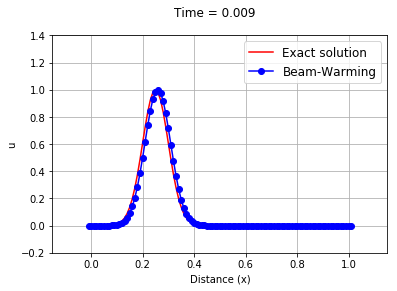

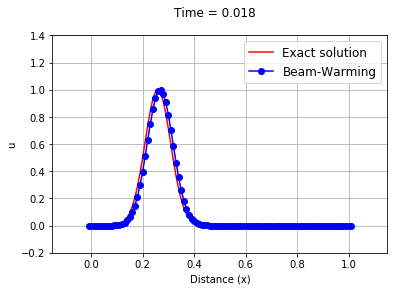

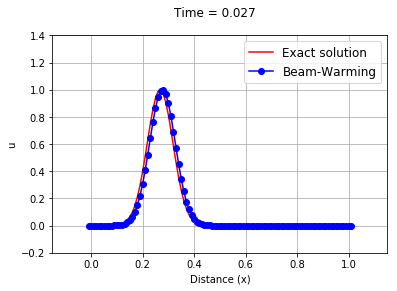

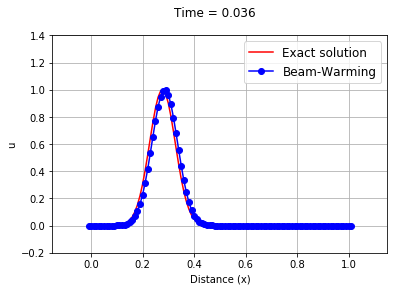

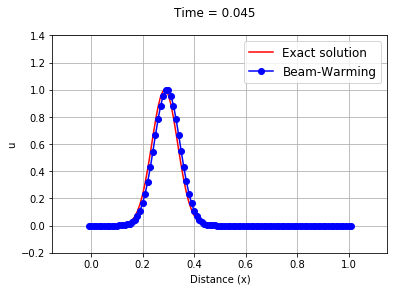

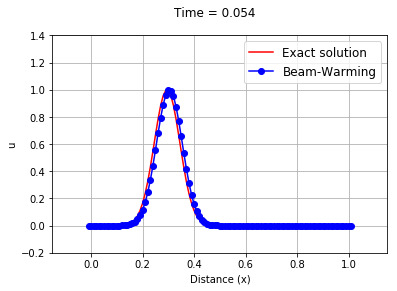

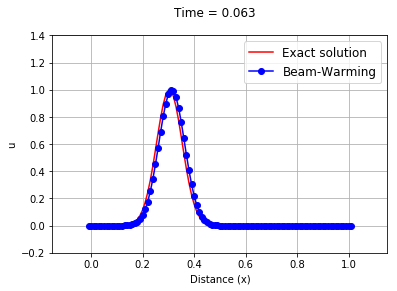

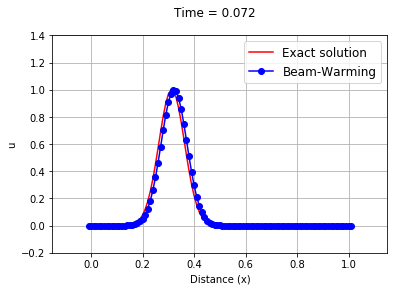

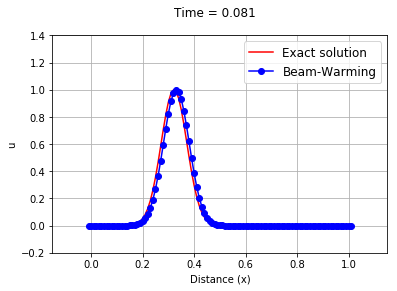

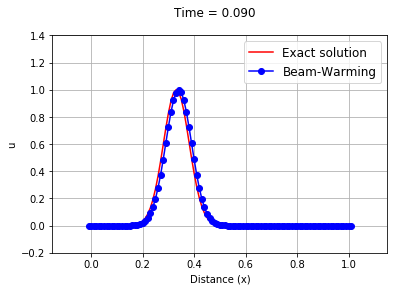

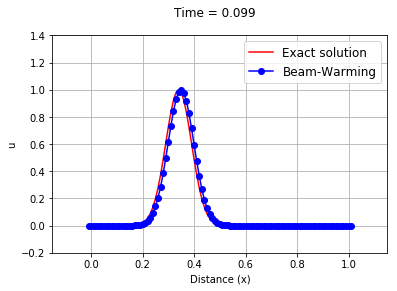

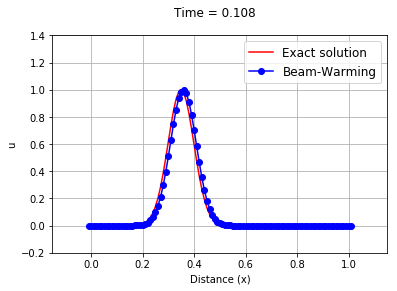

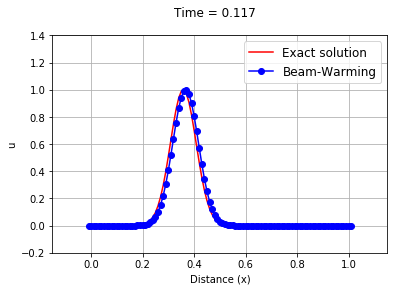

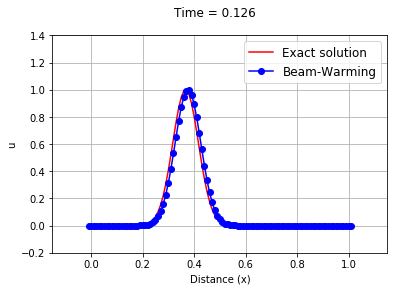

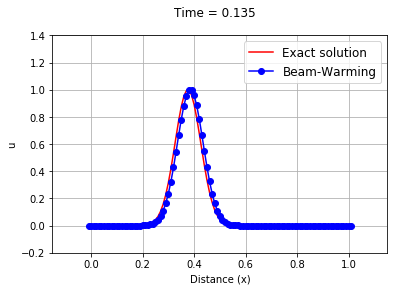

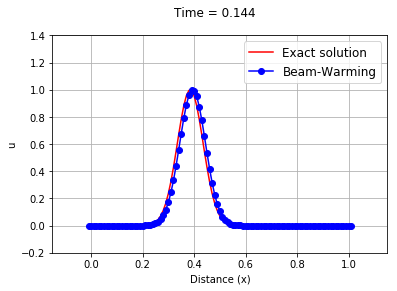

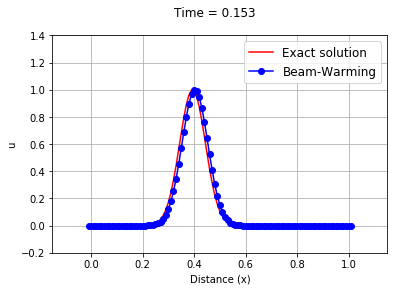

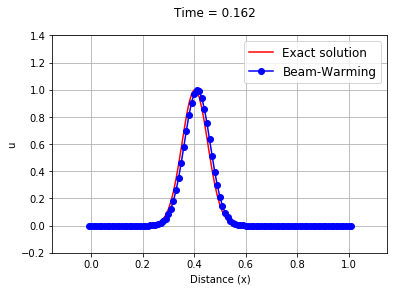

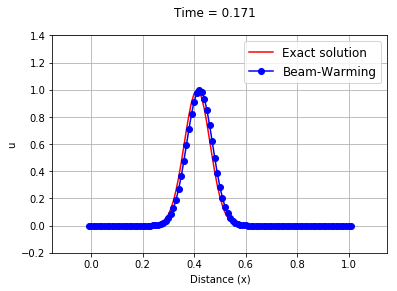

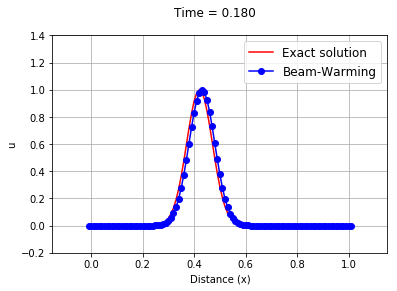

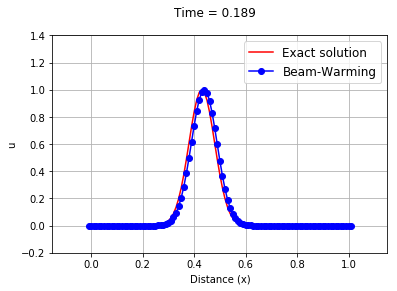

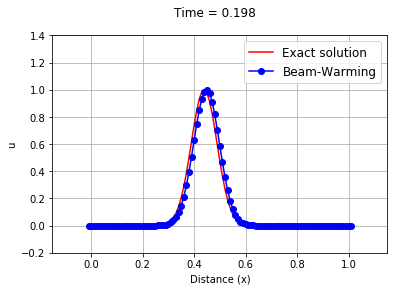

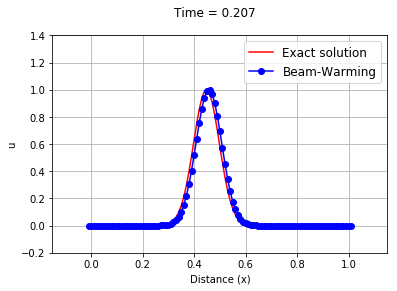

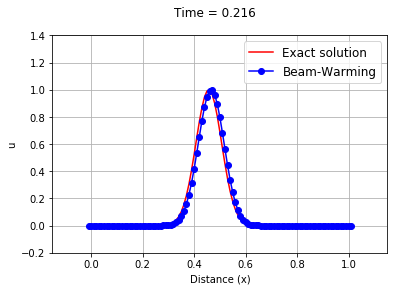

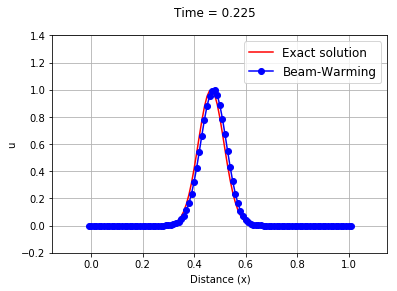

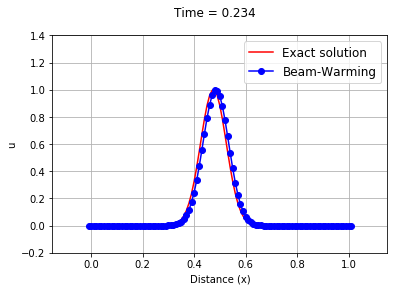

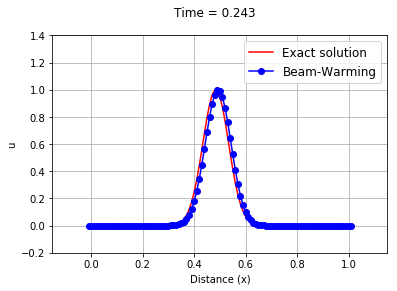

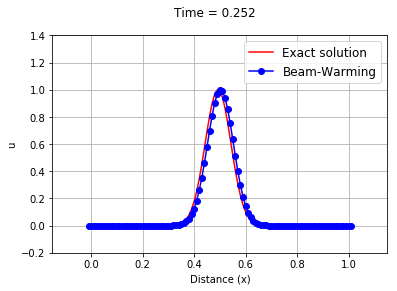

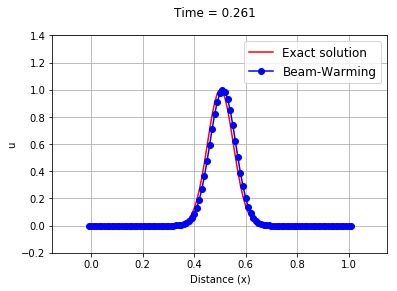

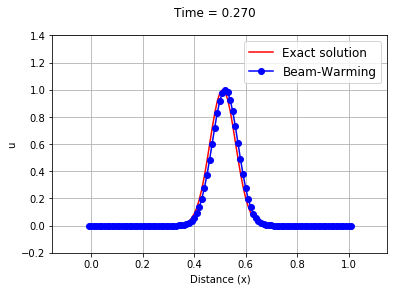

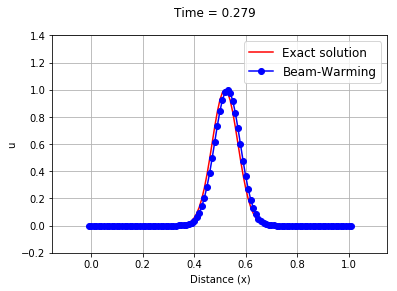

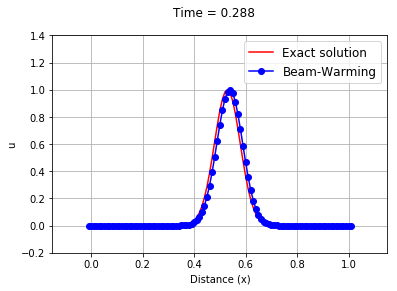

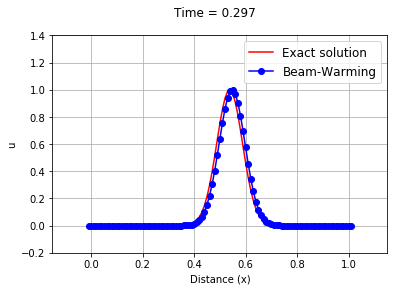

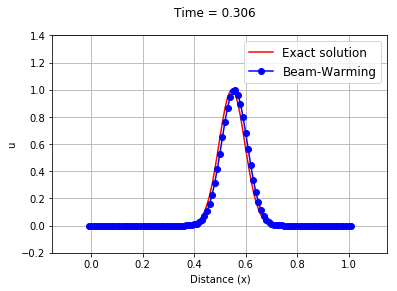

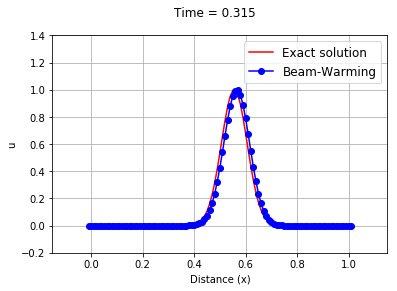

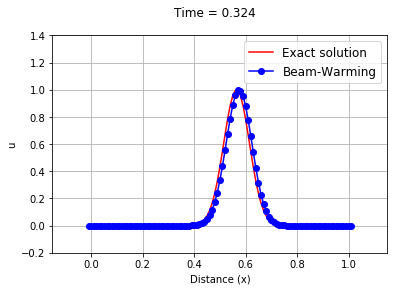

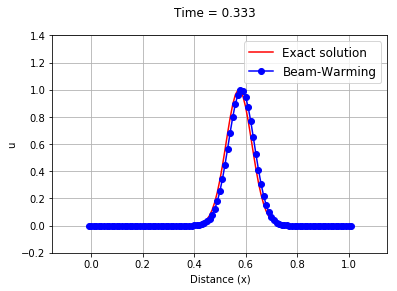

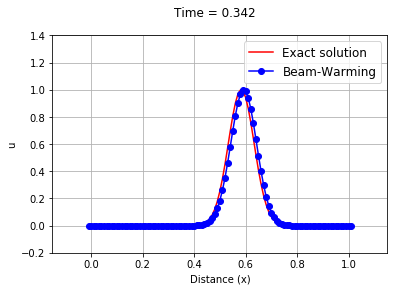

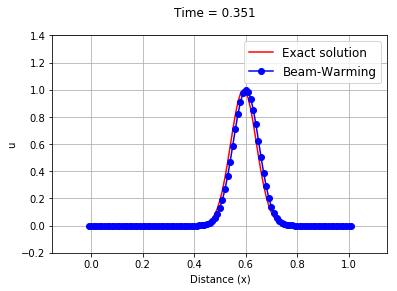

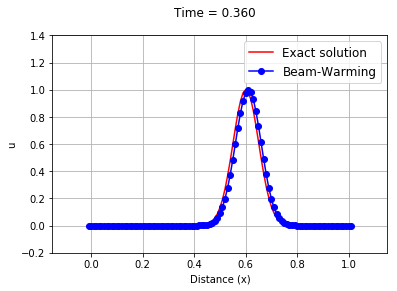

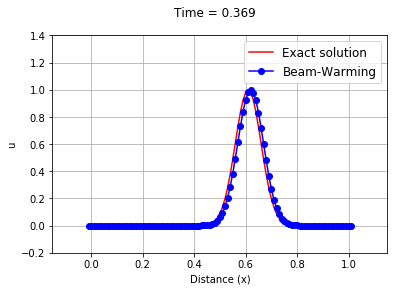

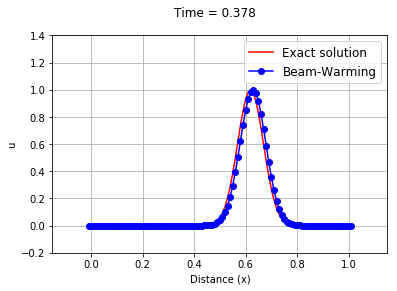

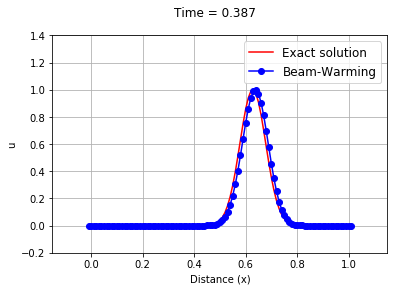

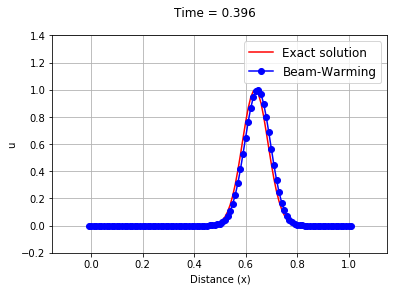

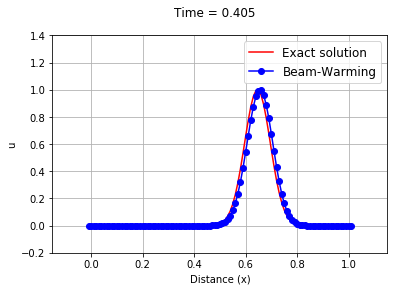

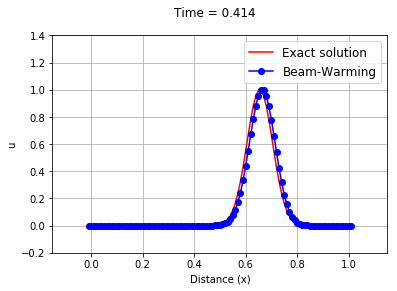

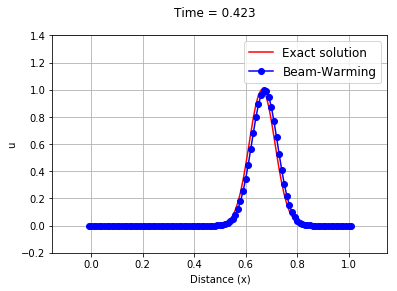

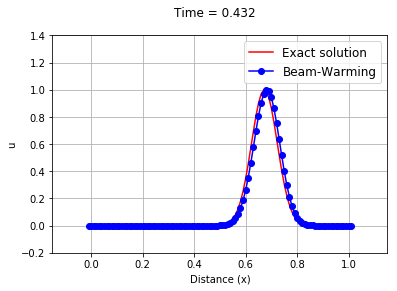

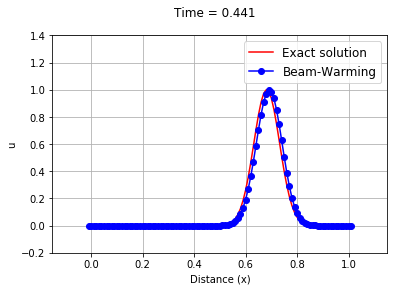

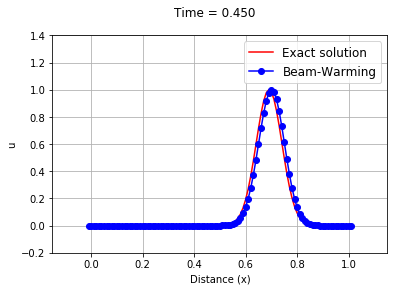

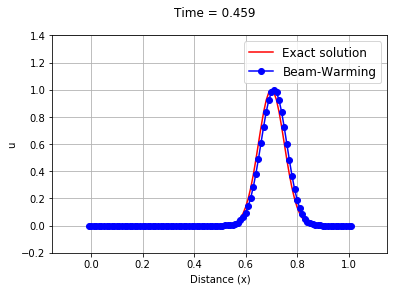

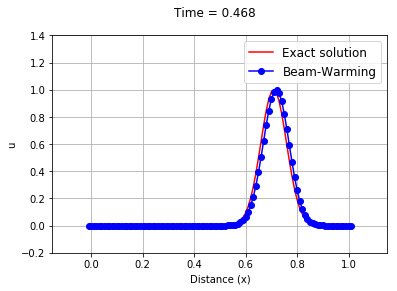

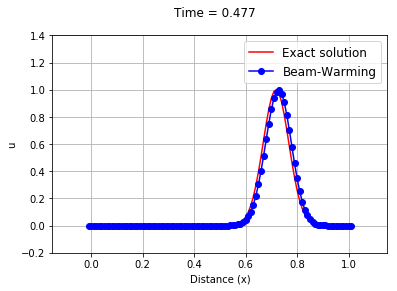

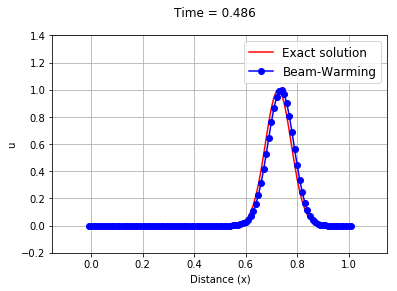

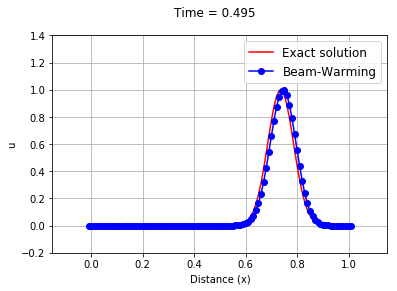

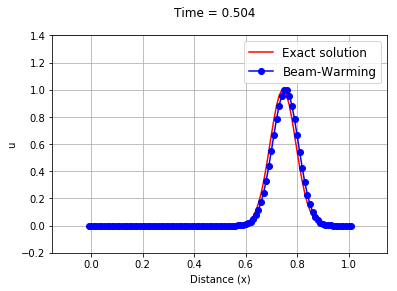

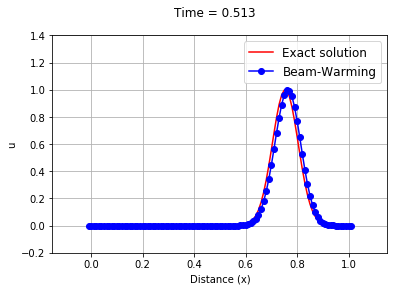

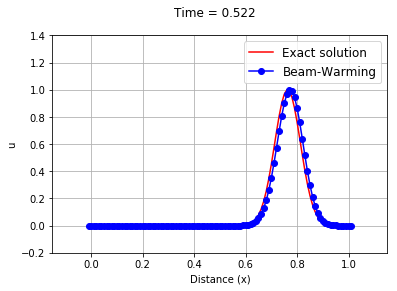

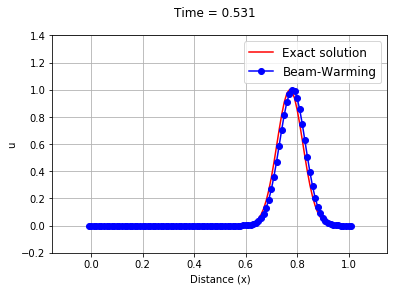

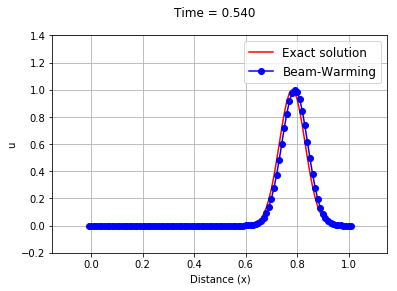

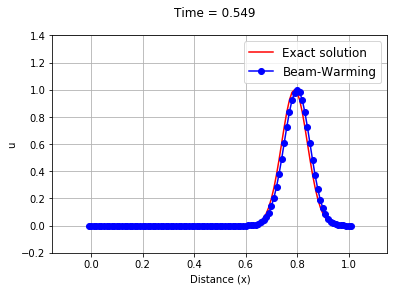

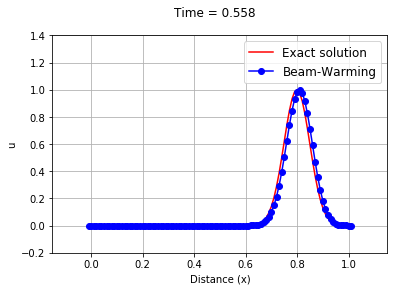

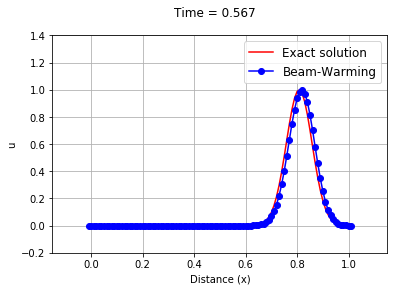

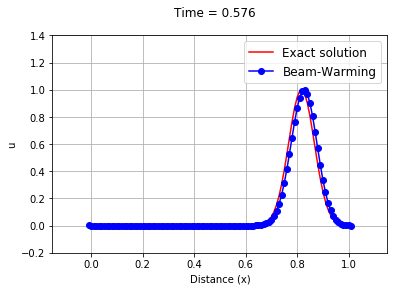

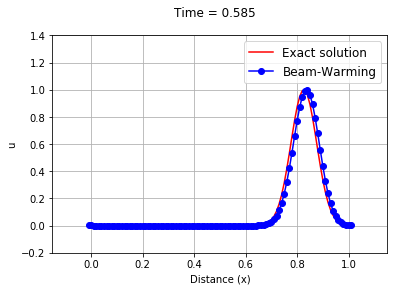

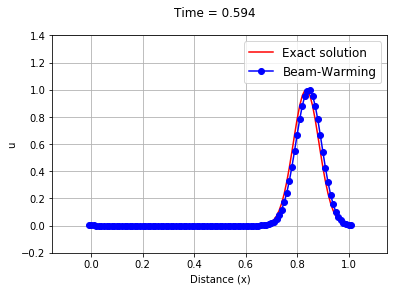

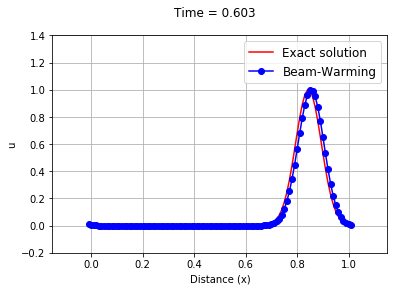

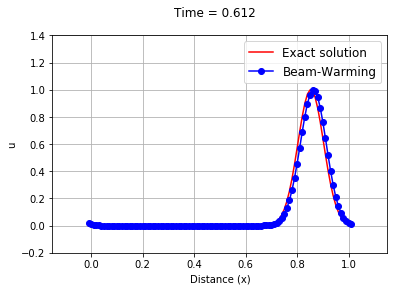

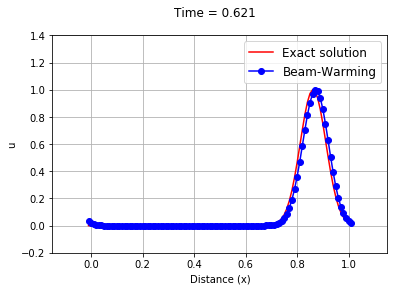

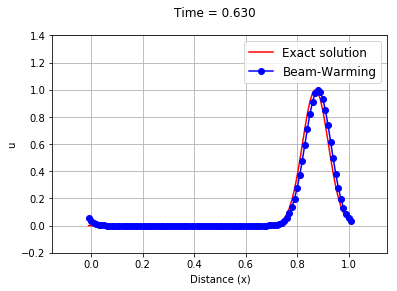

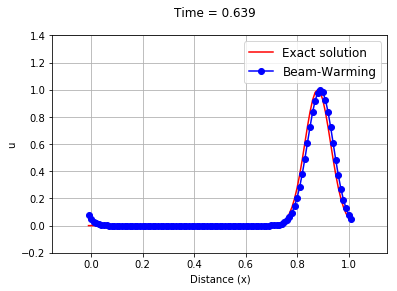

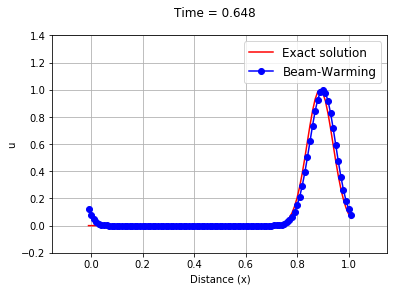

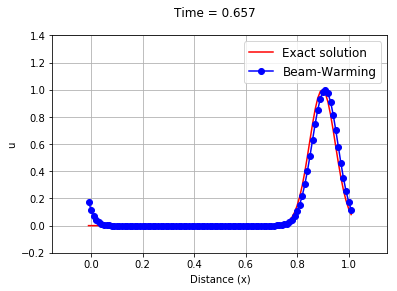

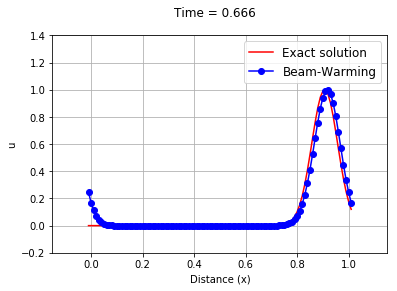

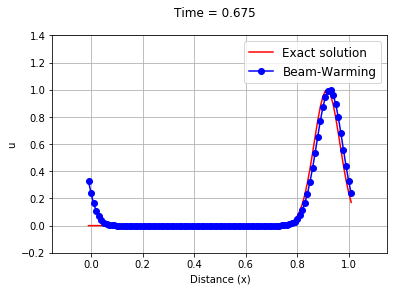

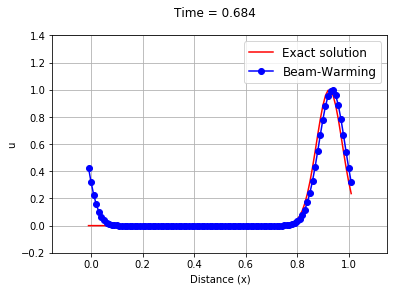

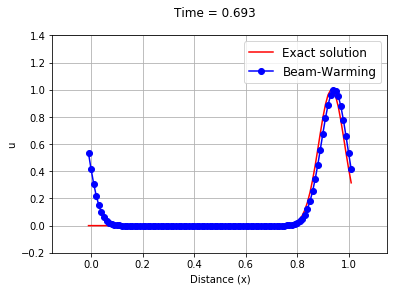

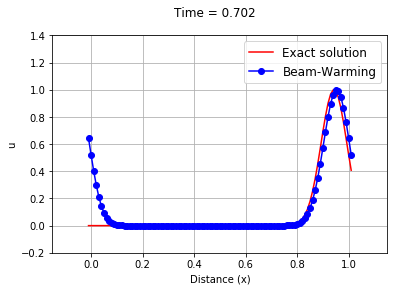

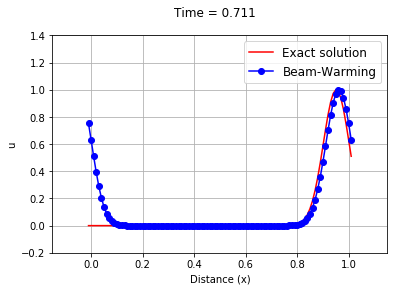

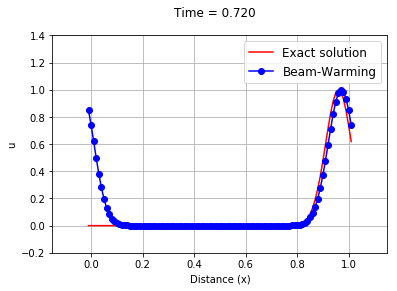

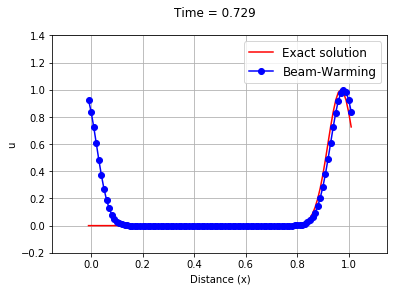

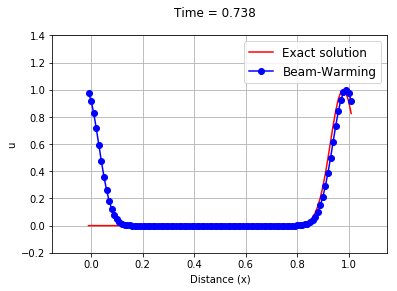

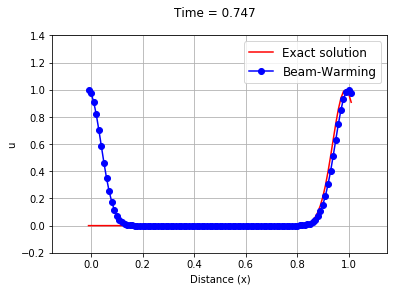

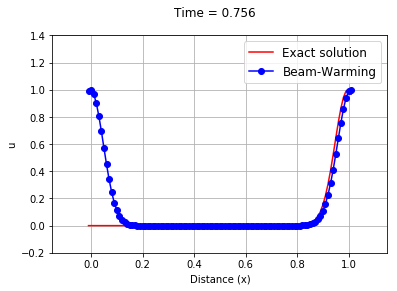

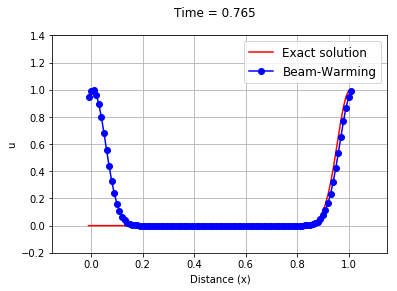

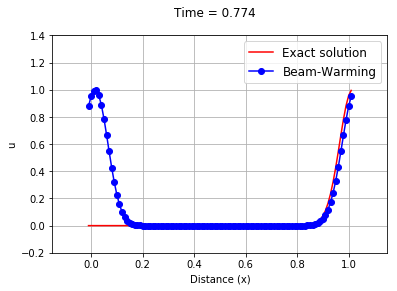

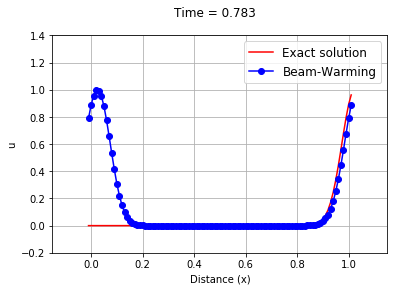

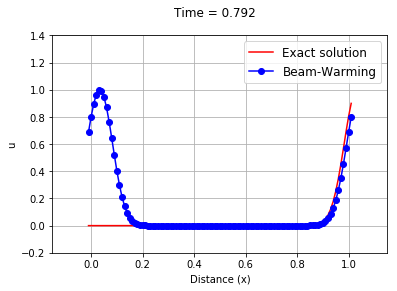

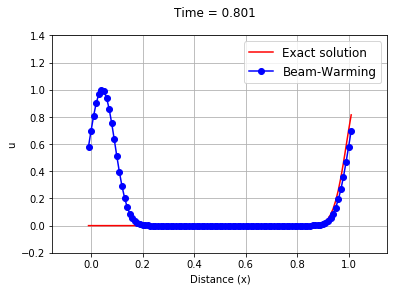

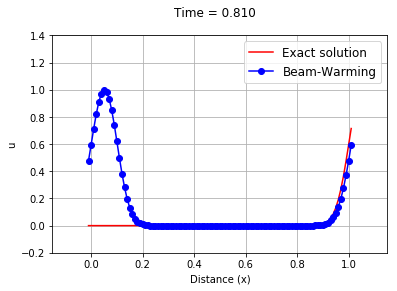

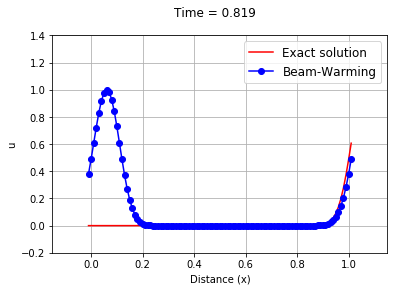

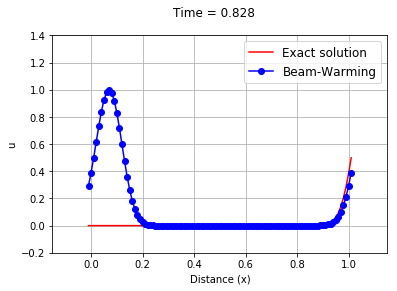

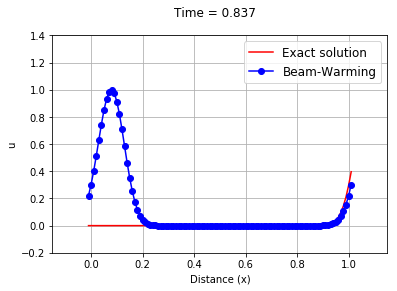

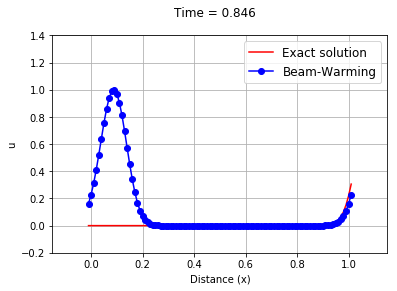

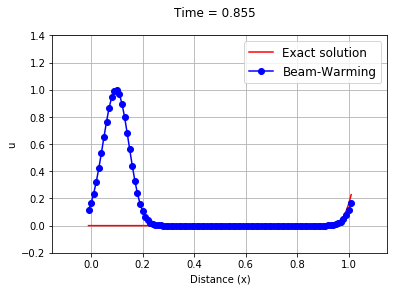

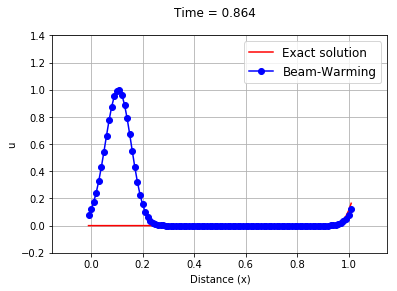

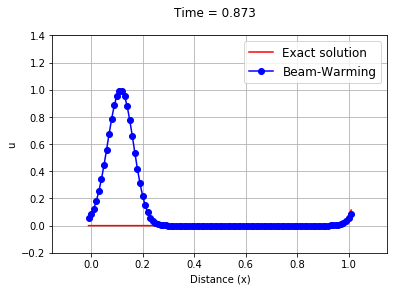

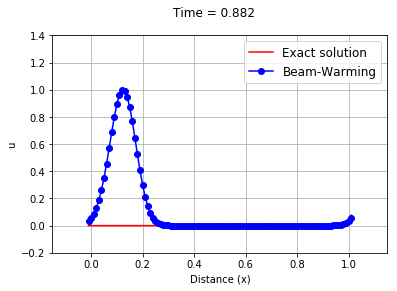

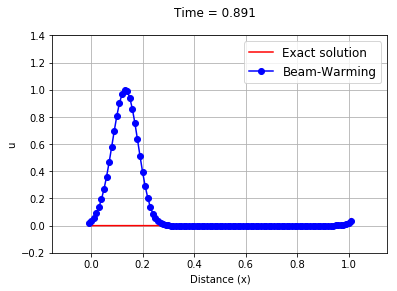

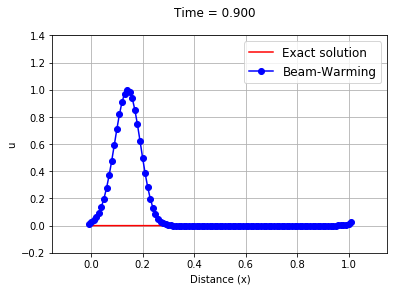

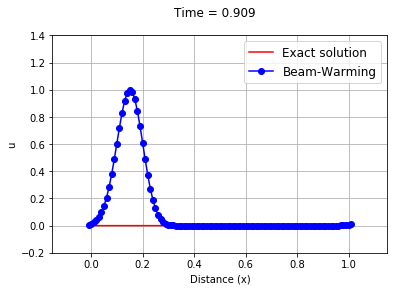

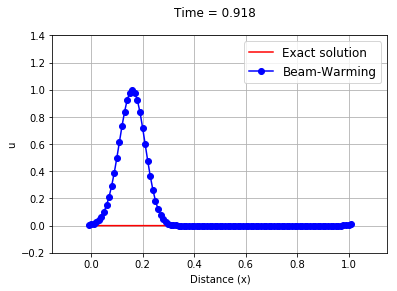

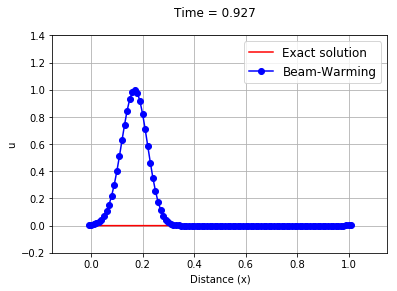

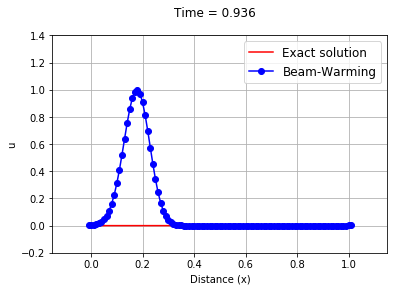

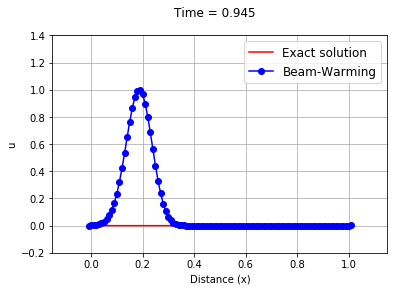

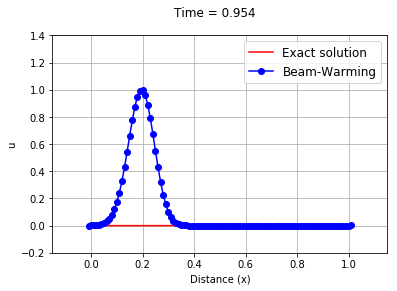

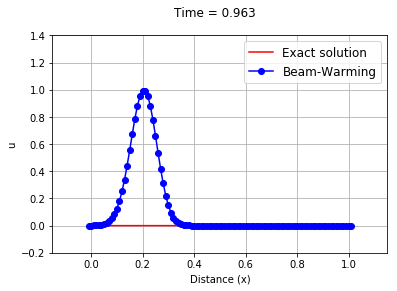

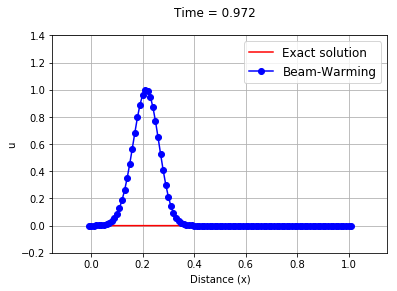

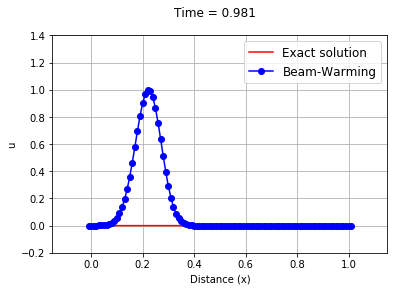

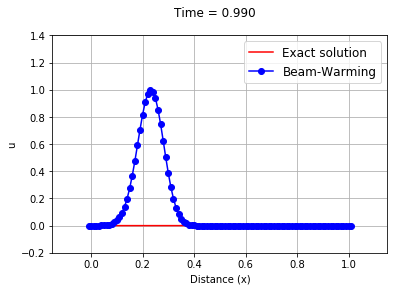

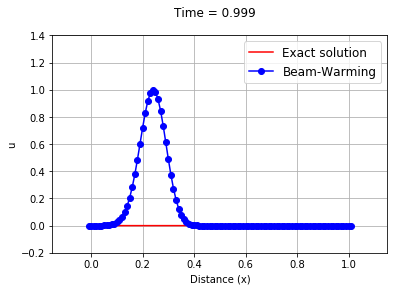

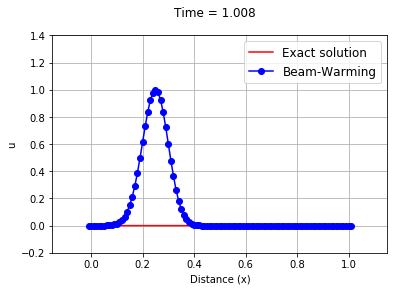

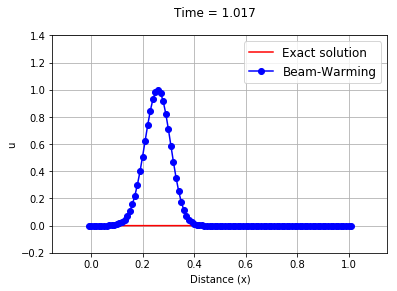

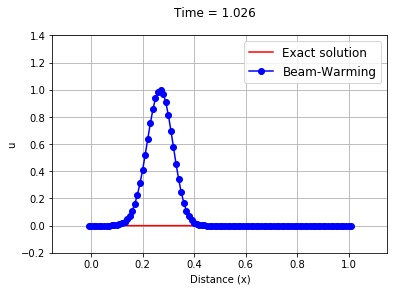

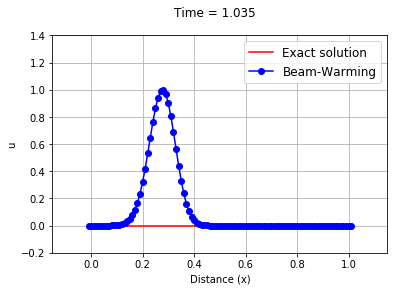

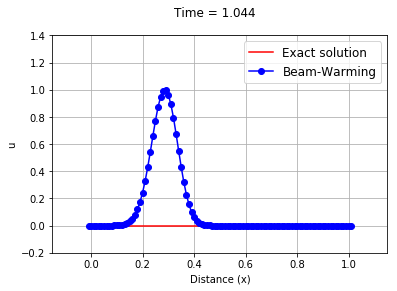

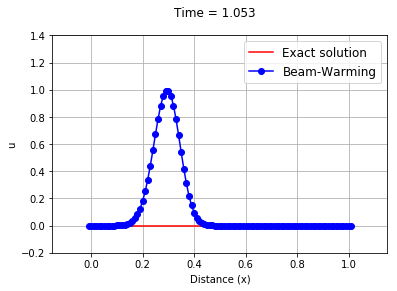

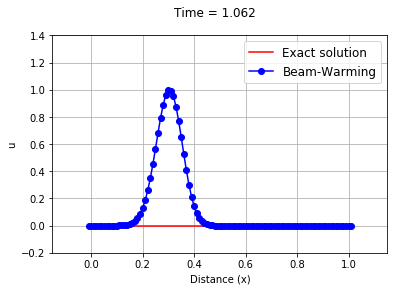

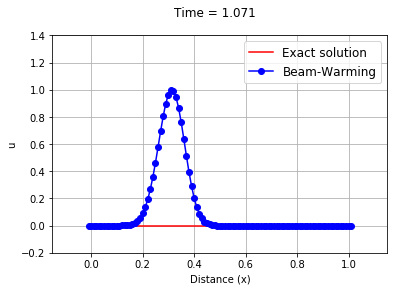

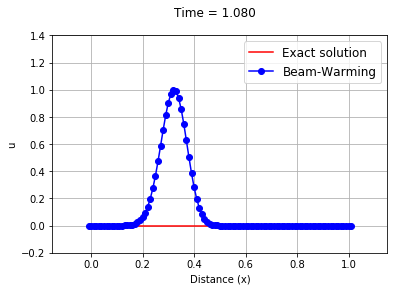

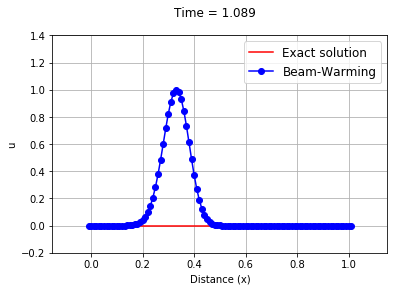

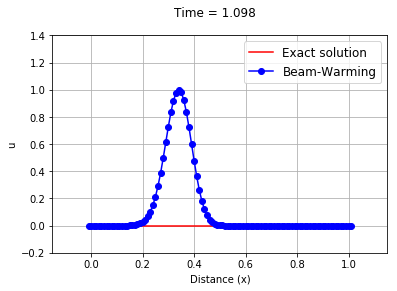

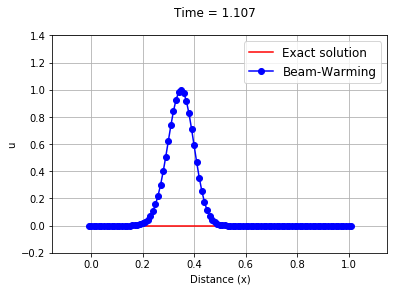

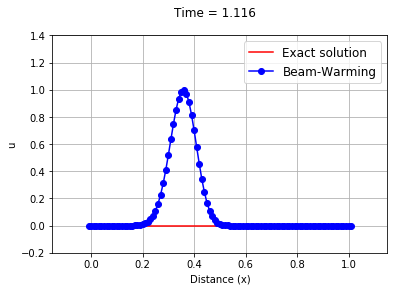

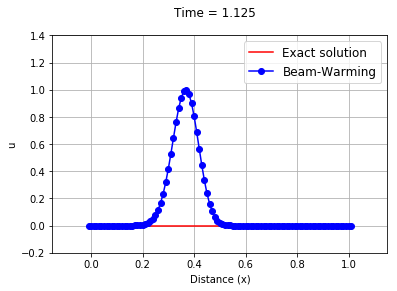

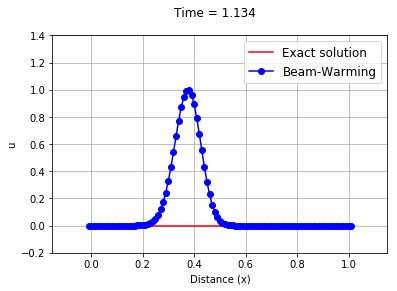

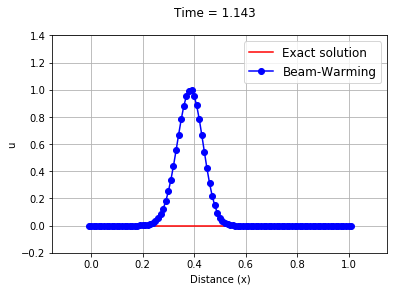

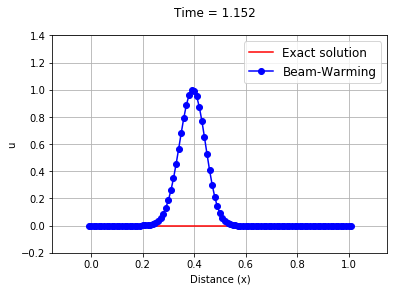

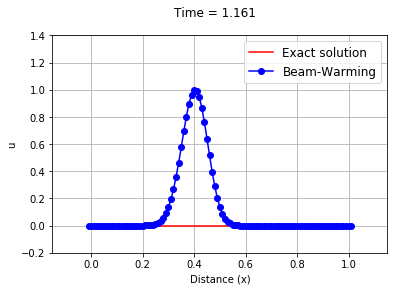

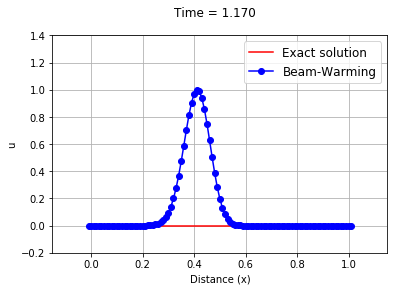

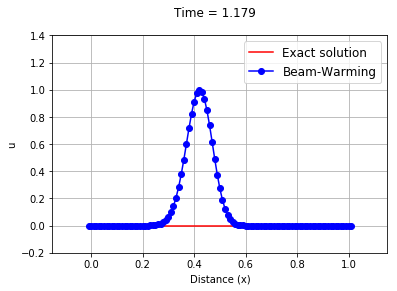

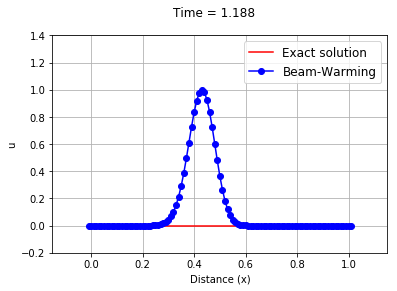

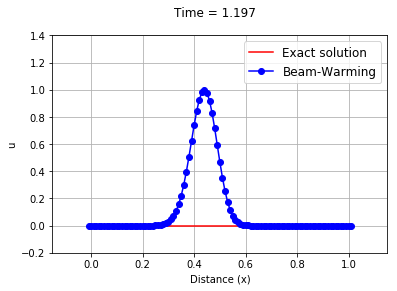

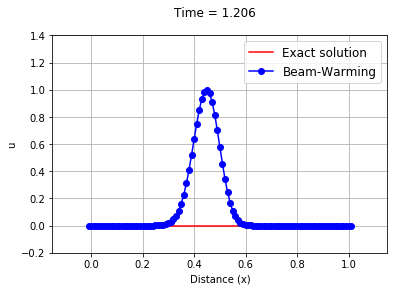

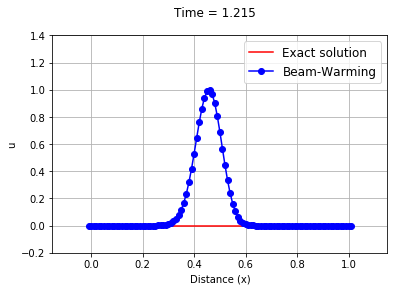

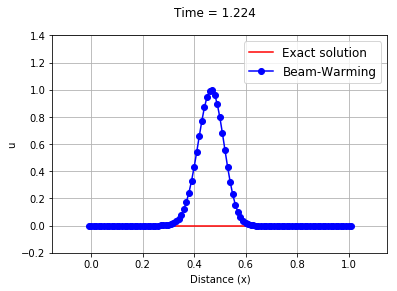

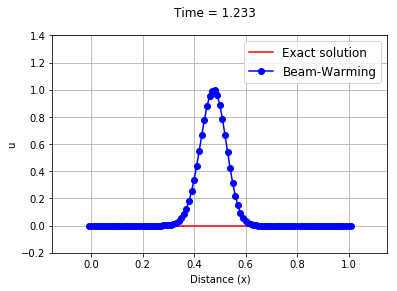

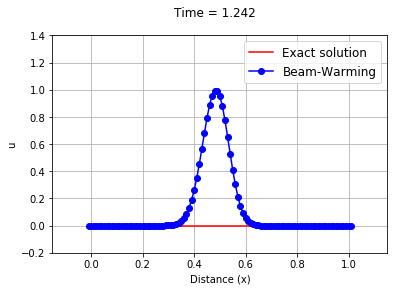

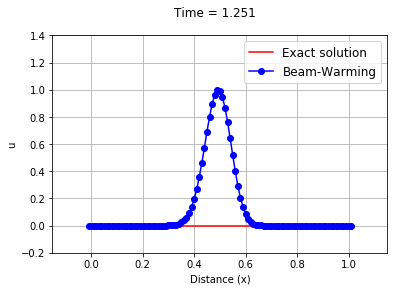

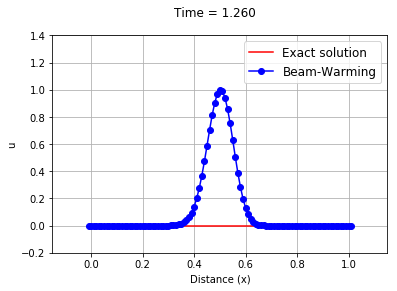

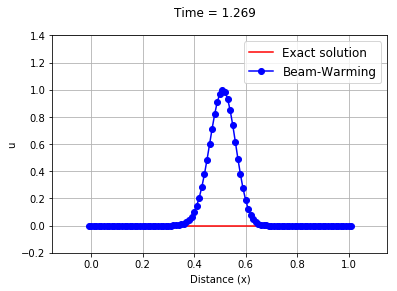

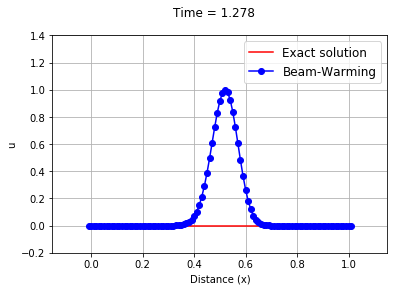

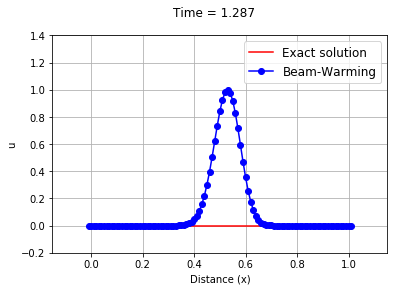

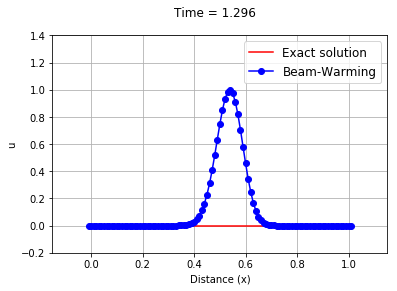

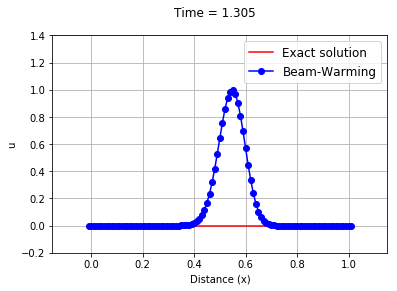

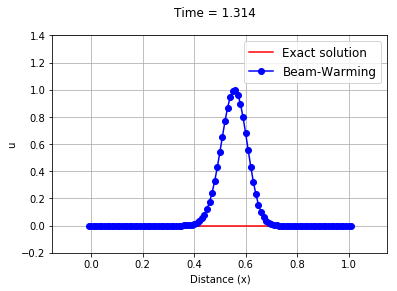

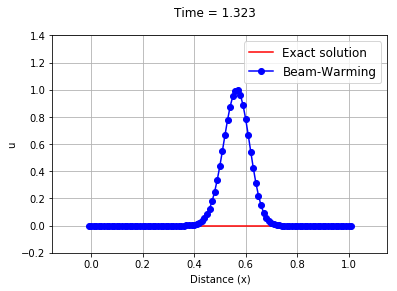

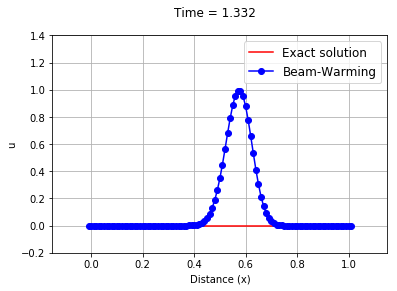

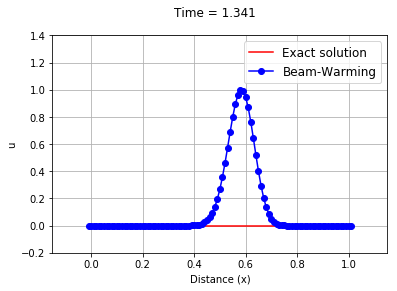

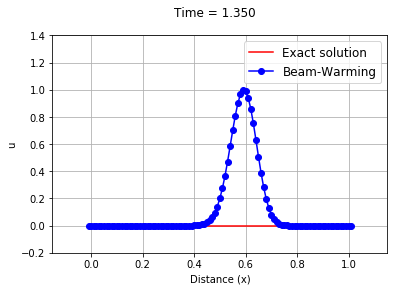

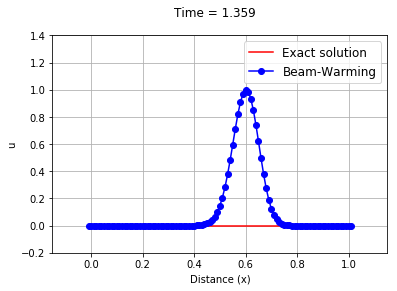

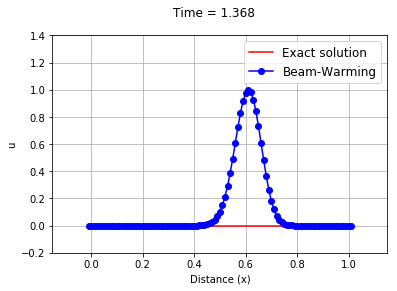

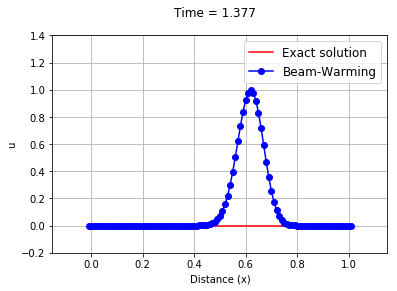

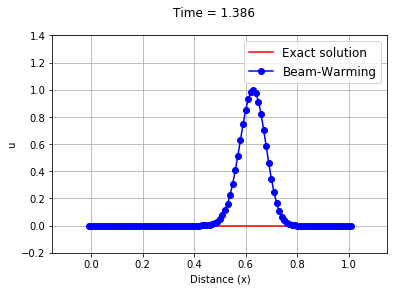

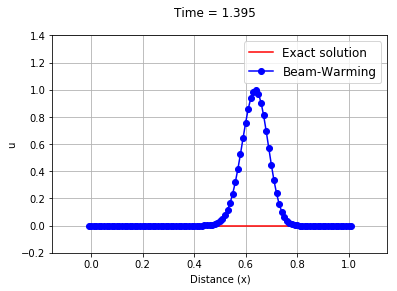

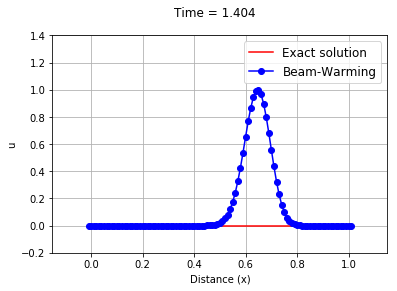

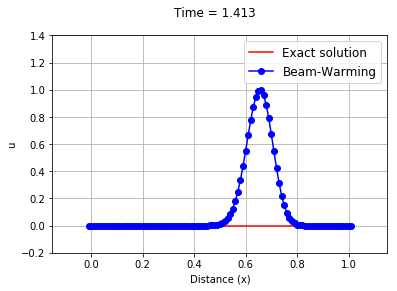

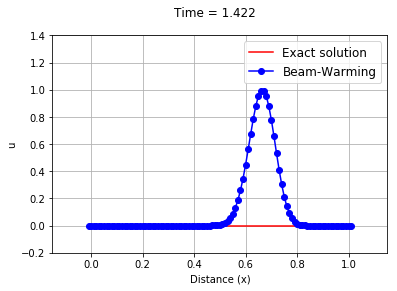

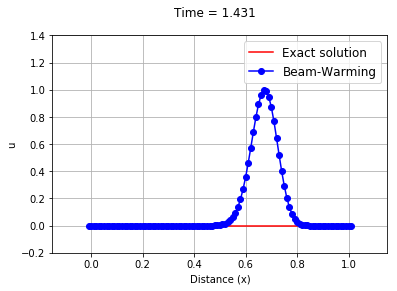

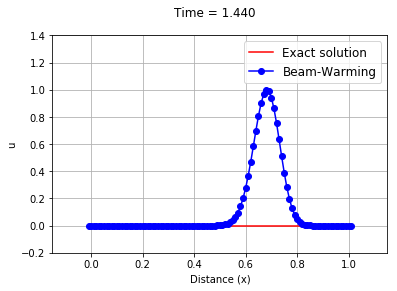

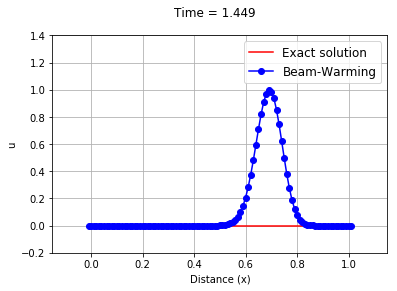

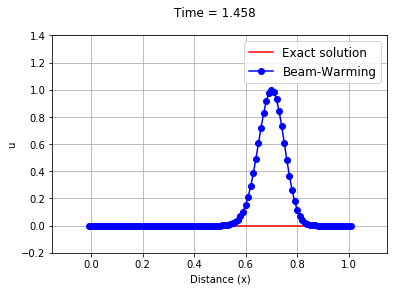

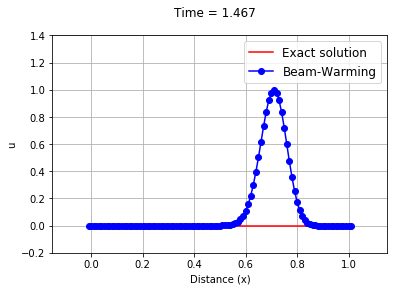

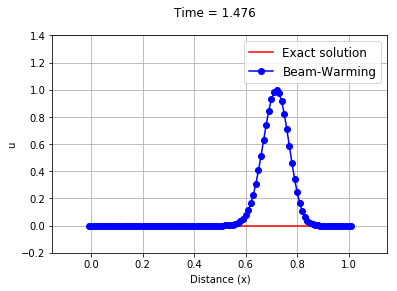

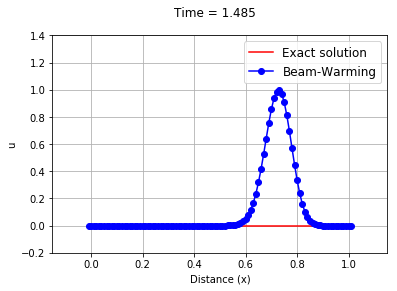

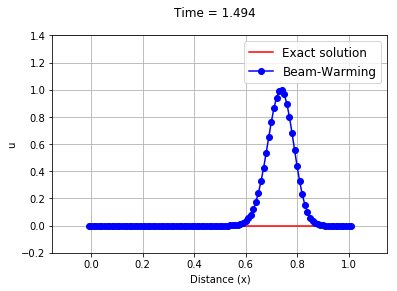

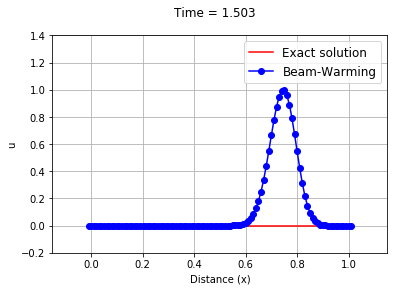

In [1]:
"""
Solve the advection equation
    U_t + vU_x = 0

over the spatial domain of 0 <= x <= 1 that is discretized 
into 103 nodes, with dx=0.01, using the Beam-Warming scheme 
given by Eq. (18.25) with a<0, for an initial profile of a 
Gaussian curve, defined by 
    U(x,t) = exp(-200*(x-xc-v*t).^2)

where xc=0.25 is the center of the curve at t=0.

Periodic boundary conditions are applied at both ends of 
the domain.
    
The velocity is v=1. The solution is iterated until t=1.5 seconds.
"""

import numpy as np
import matplotlib.pyplot as plt


class beamWarming1:
    
    def __init__(self, N, tmax):
        self.N = N # number of nodes
        self.tmax = tmax
        self.xmin = 0
        self.xmax = 1
        self.dt = 0.009 # timestep
        self.v = 1 # velocity
        self.xc = 0.25
        self.initializeDomain()
        self.initializeU()
        self.initializeParams()
        
        
    def initializeDomain(self):
        self.dx = (self.xmax - self.xmin)/self.N
        self.x = np.arange(self.xmin-self.dx, self.xmax+(2*self.dx), self.dx)
        
        
    def initializeU(self):
        u0 = np.exp(-200*(self.x-self.xc)**2)
        self.u = u0.copy()
        self.unp1 = u0.copy()
        
        
    def initializeParams(self):
        self.nsteps = round(self.tmax/self.dt)
        self.alpha1 = self.v*self.dt/(2*self.dx)
        self.alpha2 = self.v**2*self.dt**2/(2*self.dx**2)
        
        
    def solve_and_plot(self):
        tc = 0
        
        for i in range(self.nsteps):
            plt.clf()
            
            # The Beam-Warming scheme, Eq. (18.25)
            for j in range(self.N+3):
                self.unp1[j] = self.u[j] - self.alpha1*(3*self.u[j] - 4*self.u[j-1] + self.u[j-2]) + \
                self.alpha2*(self.u[j] - 2*self.u[j-1] + self.u[j-2])
                
            self.u = self.unp1.copy()
            
            # Periodic boundary conditions
            self.u[0] = self.u[self.N+1]
            self.u[1] = self.u[self.N+2]
            
            uexact = np.exp(-200*(self.x-self.xc-self.v*tc)**2)
            
            plt.plot(self.x, uexact, 'r', label="Exact solution")
            plt.plot(self.x, self.u, 'bo-', label="Beam-Warming")
            plt.axis((self.xmin-0.15, self.xmax+0.15, -0.2, 1.4))
            plt.grid(True)
            plt.xlabel("Distance (x)")
            plt.ylabel("u")
            plt.legend(loc=1, fontsize=12)
            plt.suptitle("Time = %1.3f" % (tc+self.dt))
            plt.pause(0.01)
            tc += self.dt
            

def main():
    sim = beamWarming1(100, 1.5)
    sim.solve_and_plot()
    plt.show()
    
if __name__ == "__main__":
    main()

#N = 100  
#tmax = 2.5 # maximum value of t





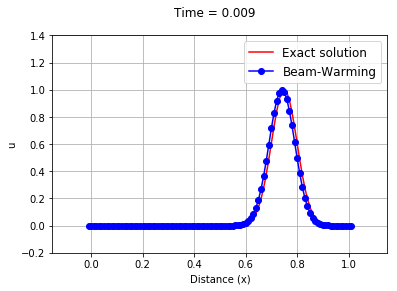

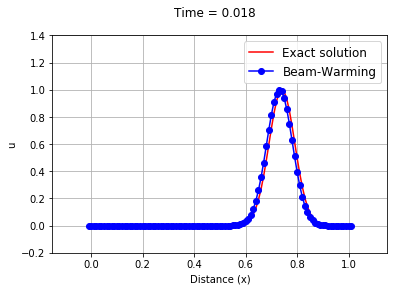

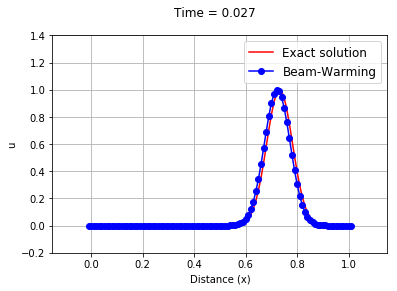

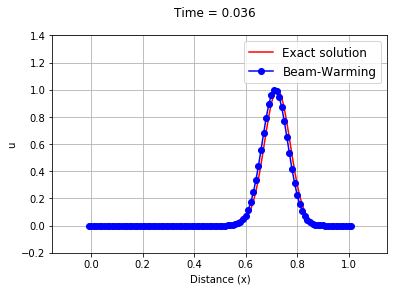

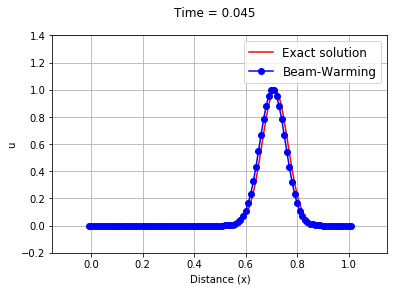

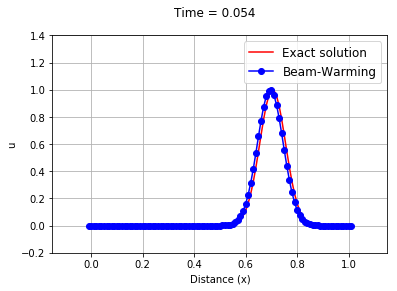

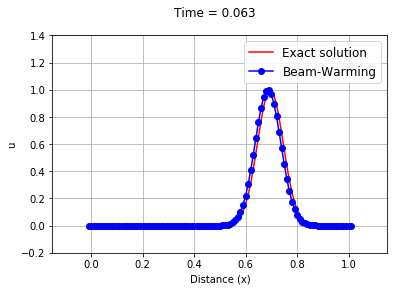

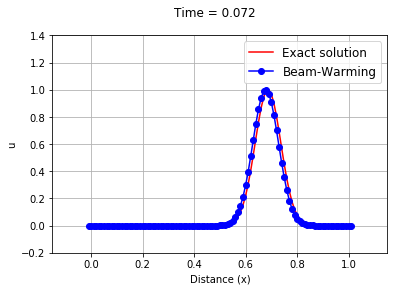

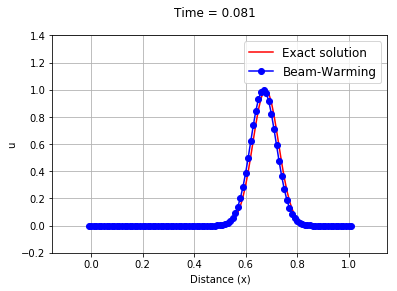

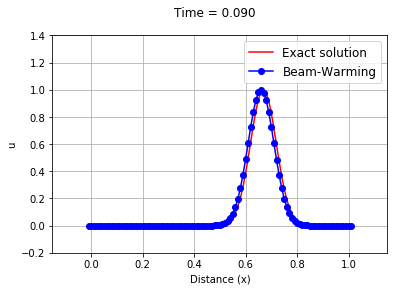

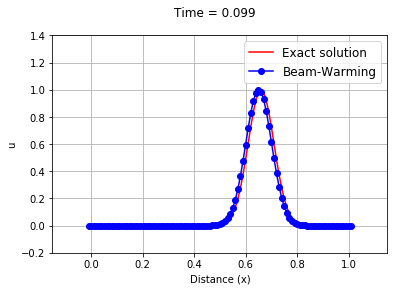

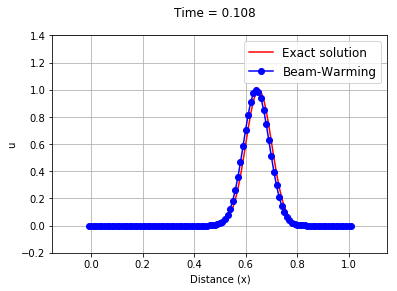

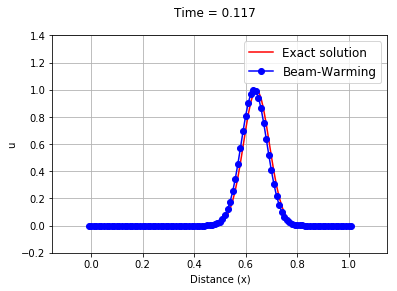

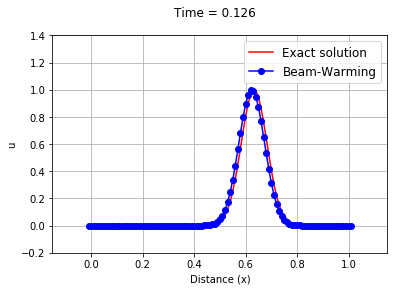

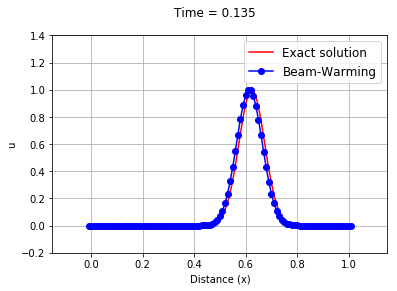

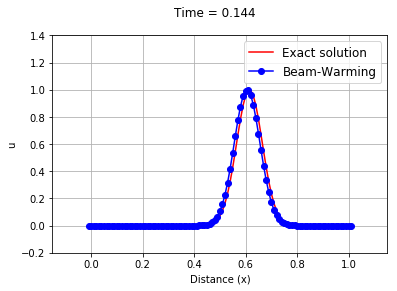

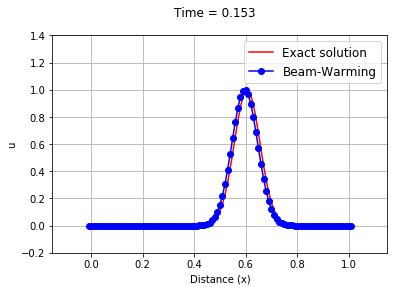

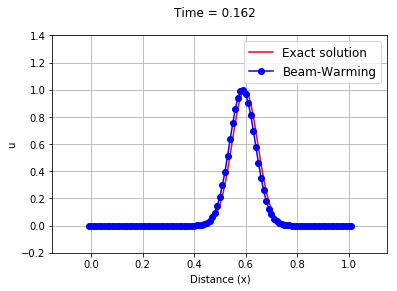

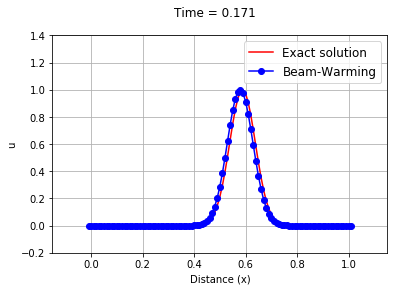

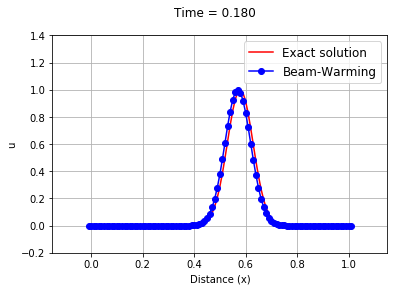

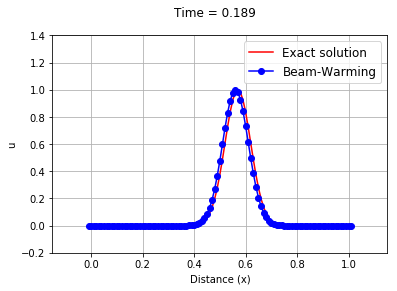

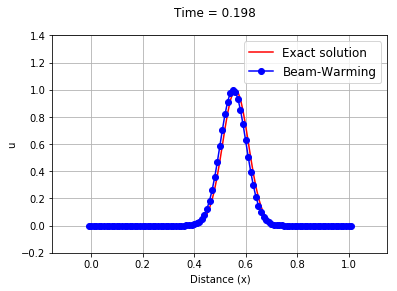

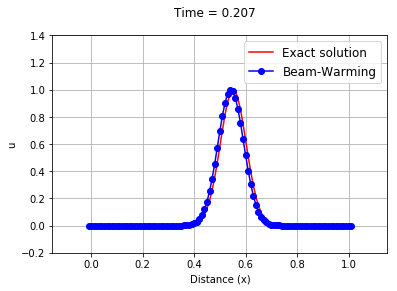

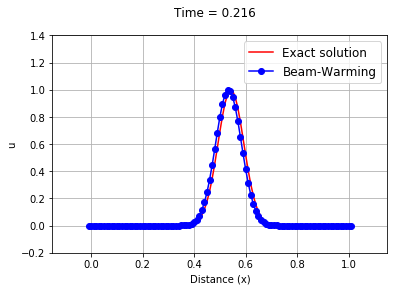

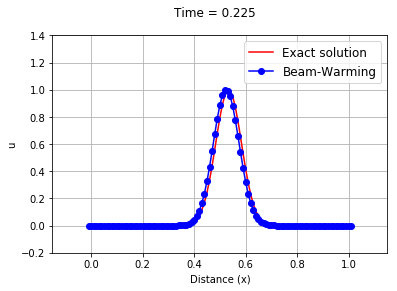

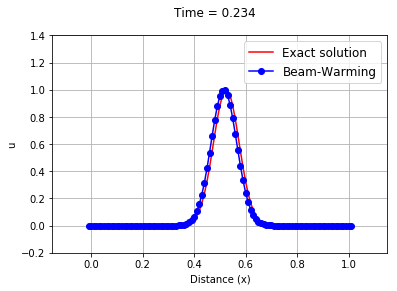

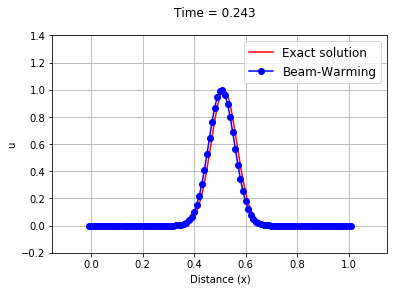

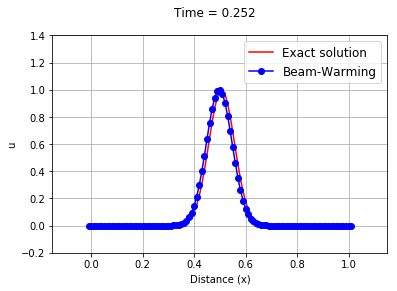

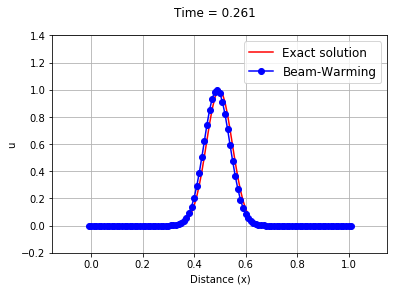

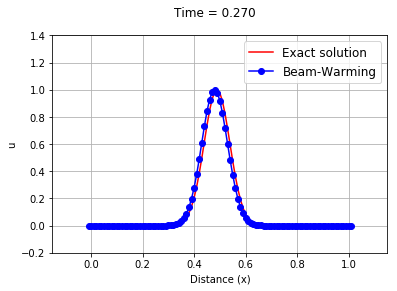

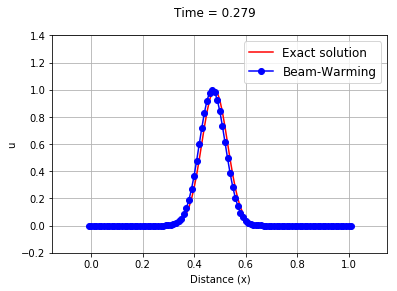

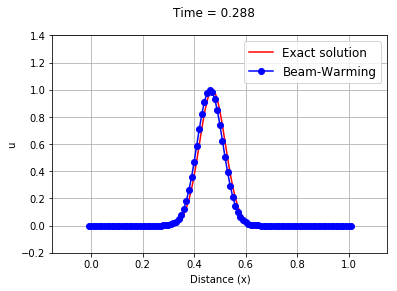

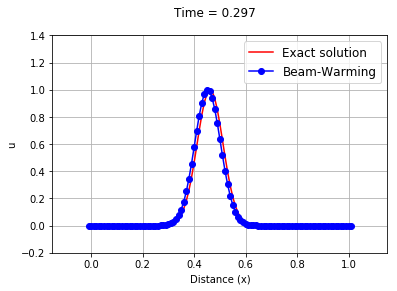

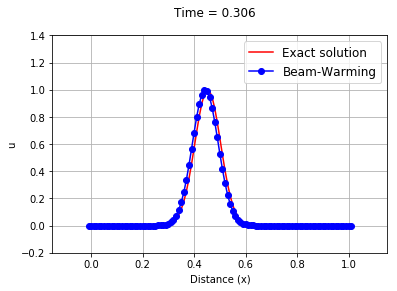

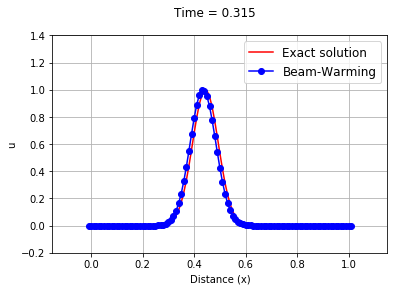

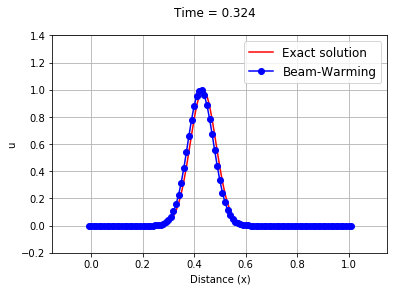

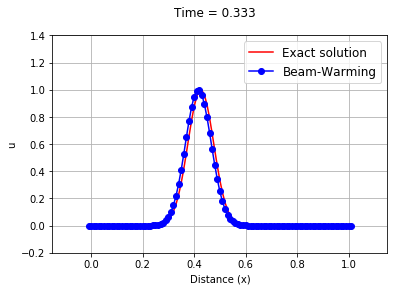

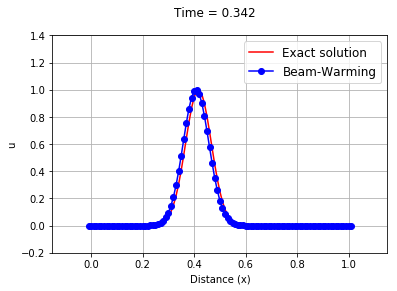

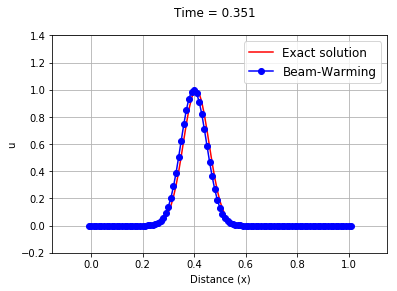

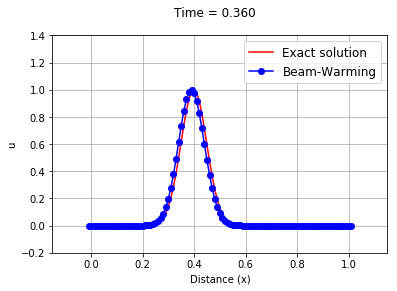

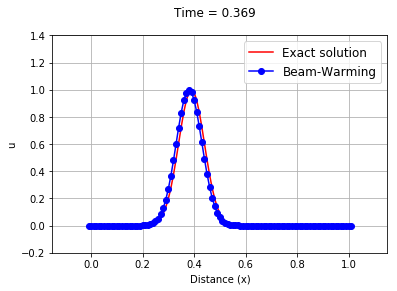

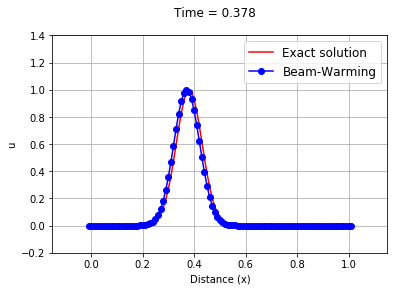

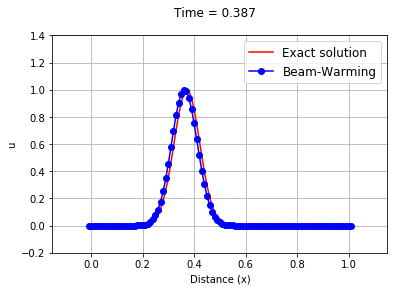

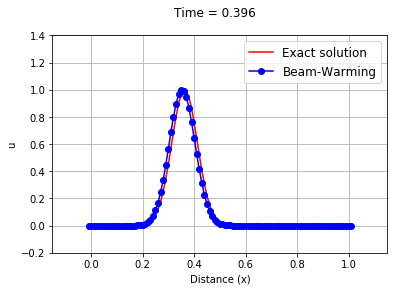

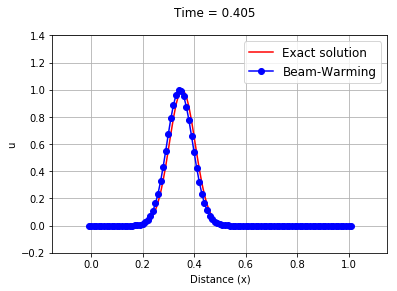

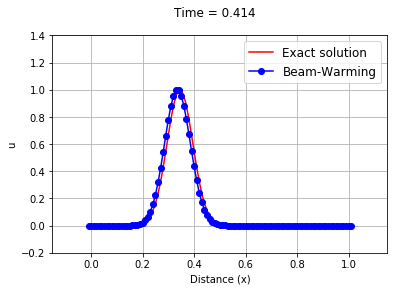

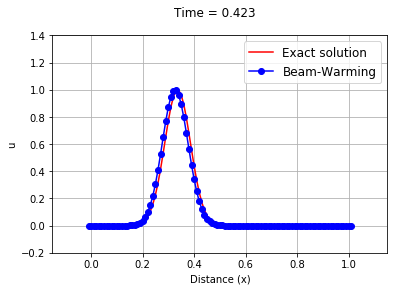

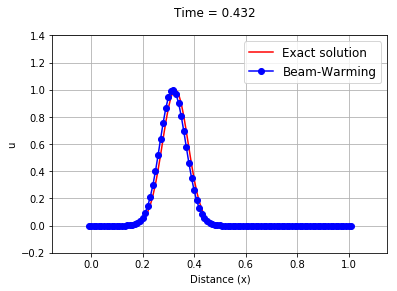

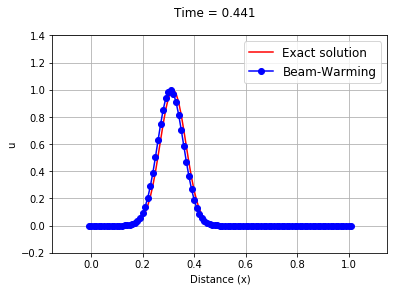

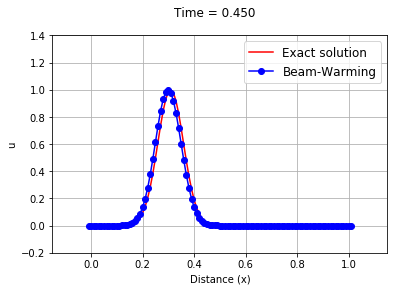

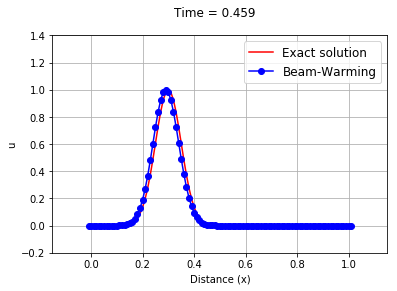

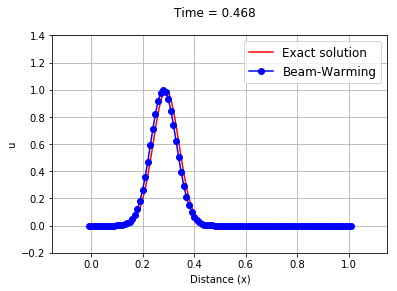

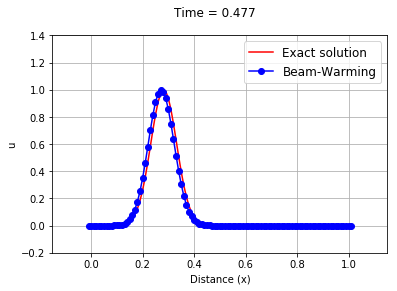

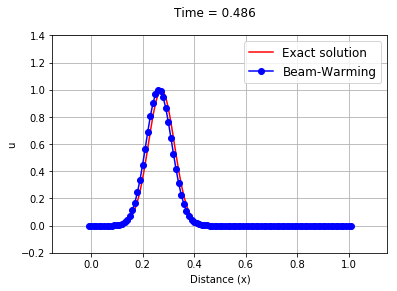

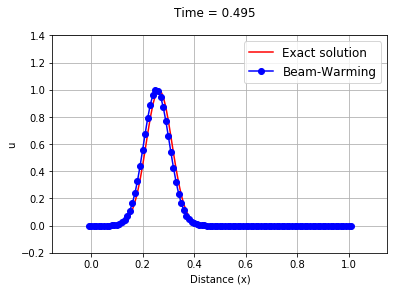

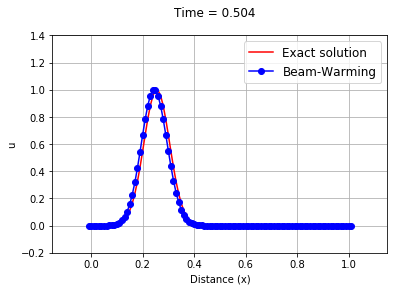

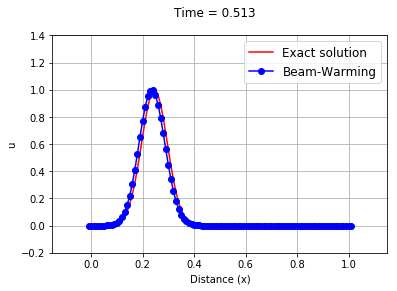

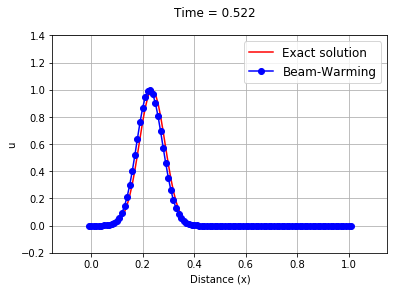

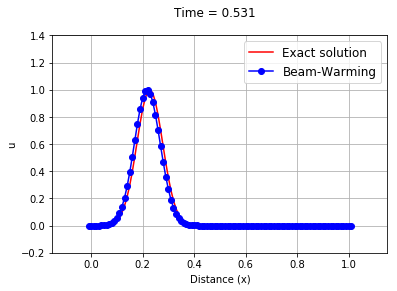

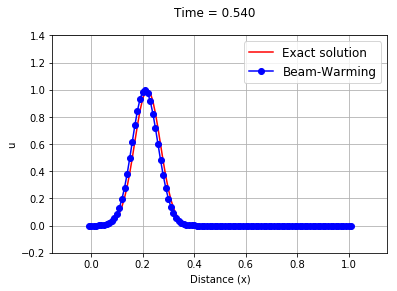

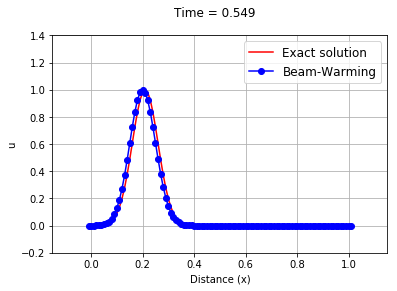

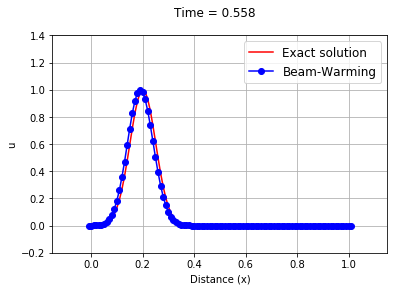

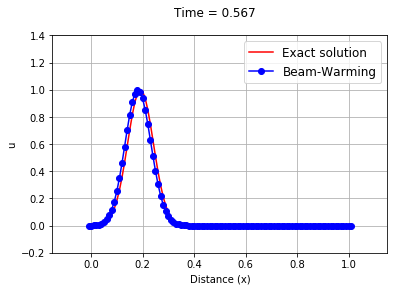

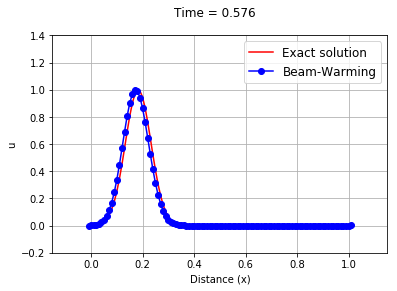

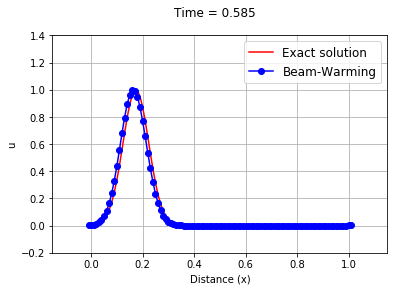

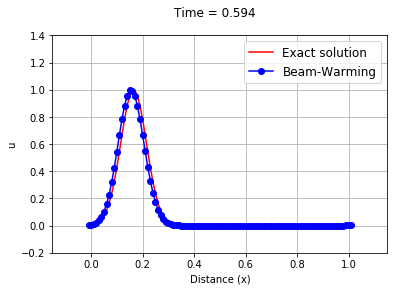

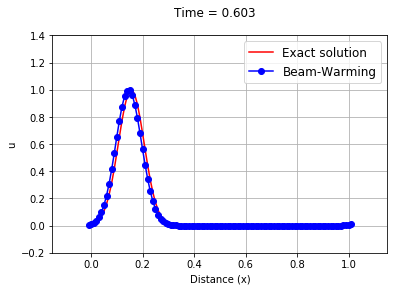

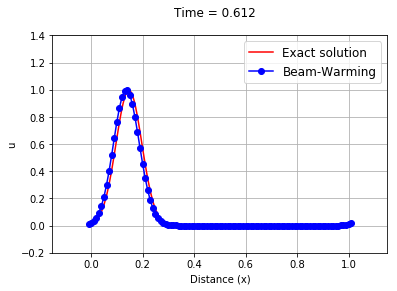

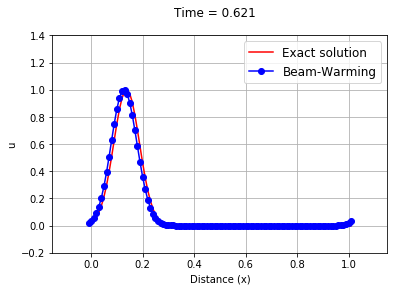

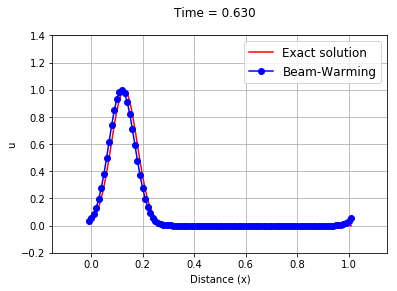

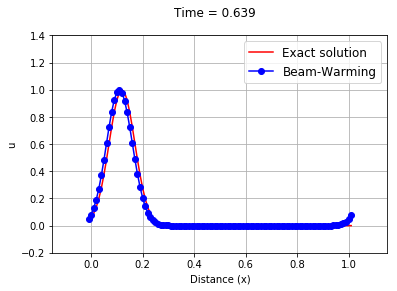

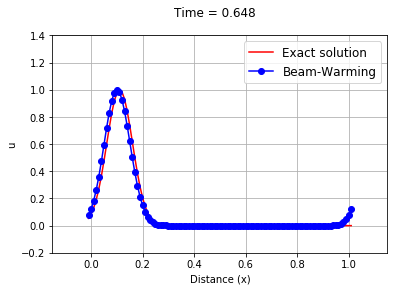

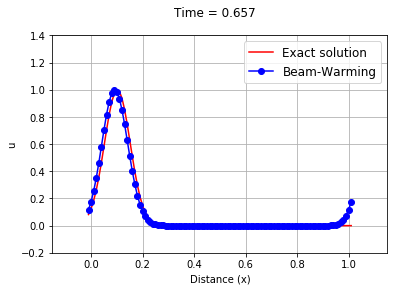

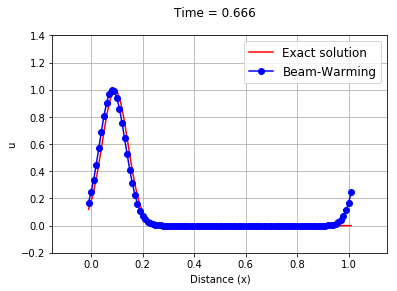

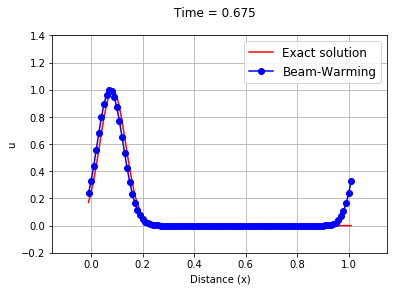

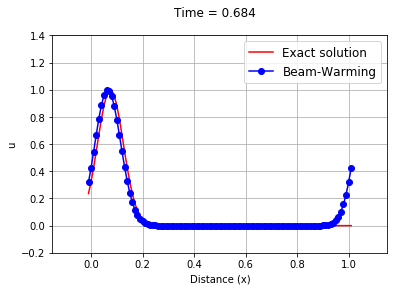

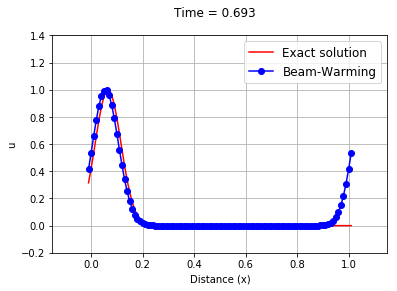

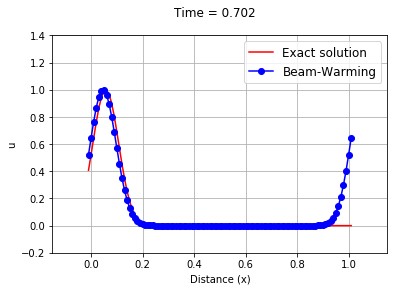

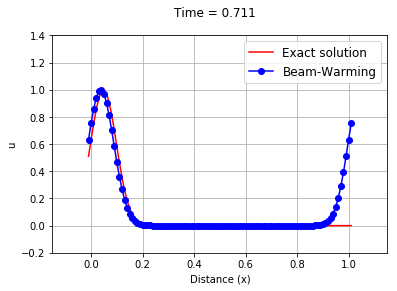

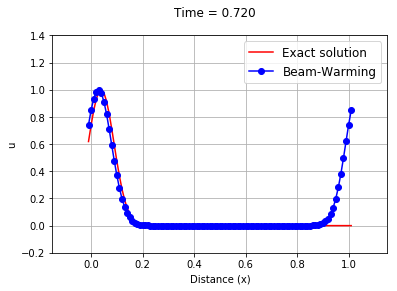

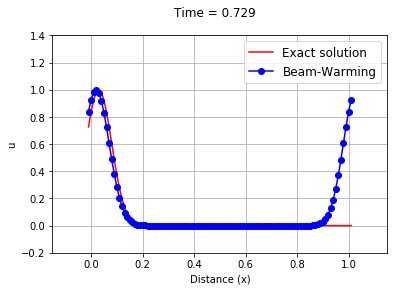

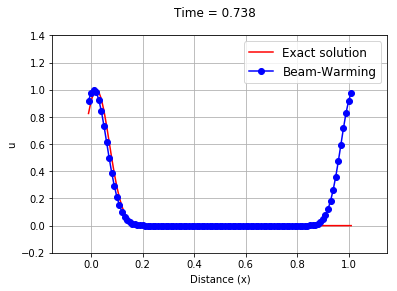

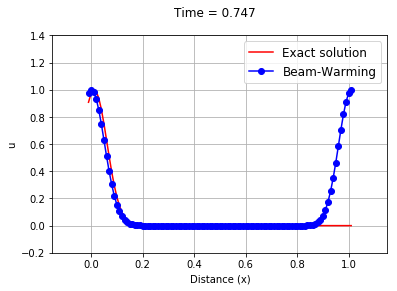

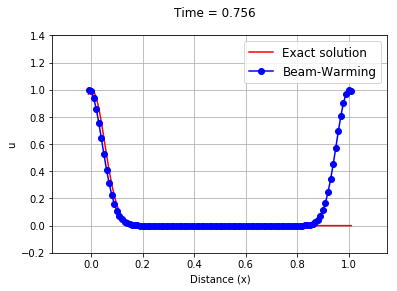

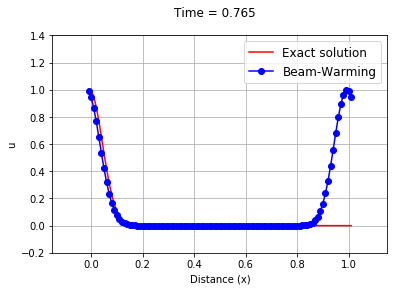

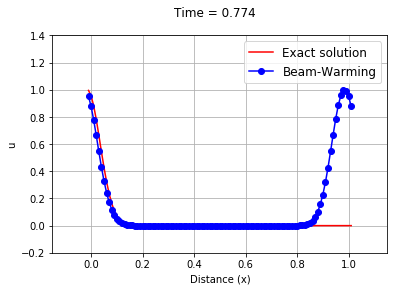

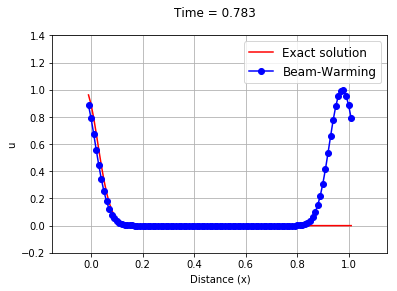

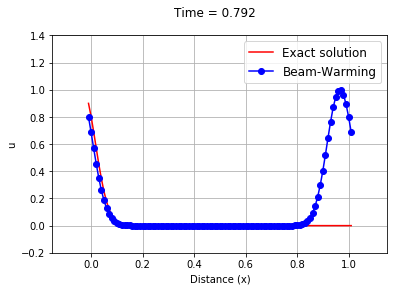

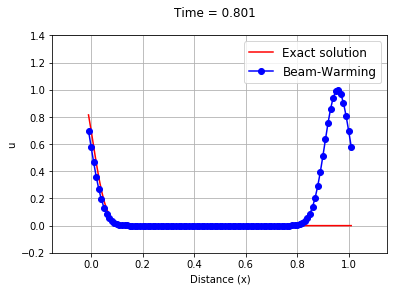

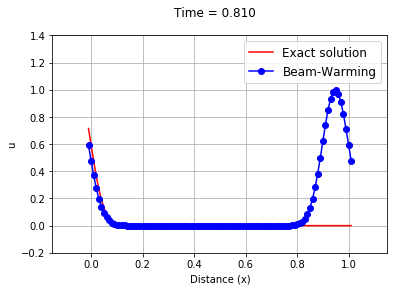

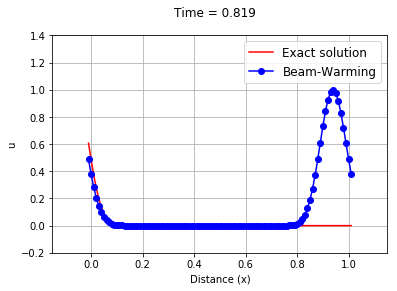

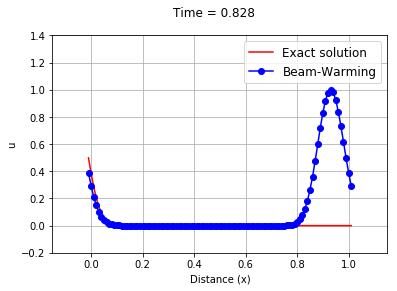

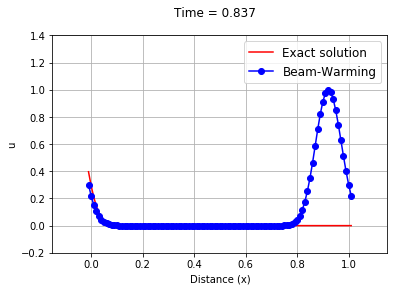

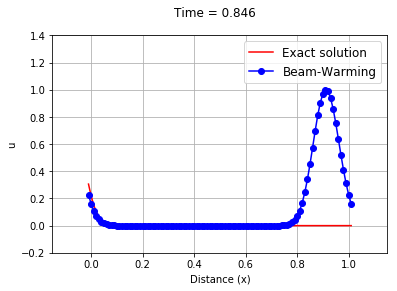

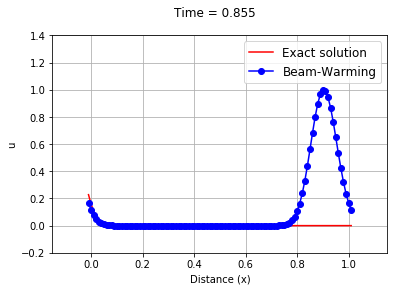

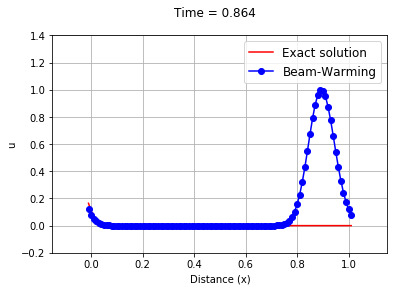

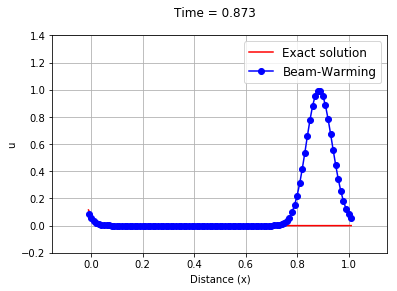

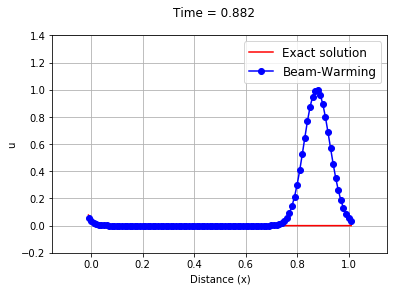

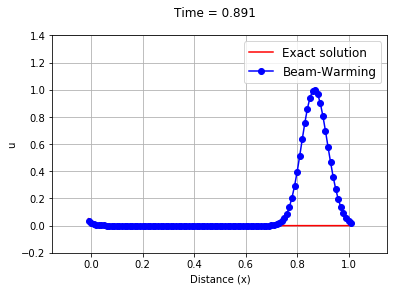

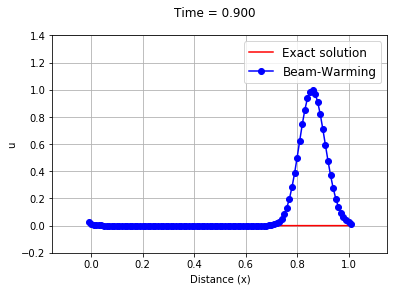

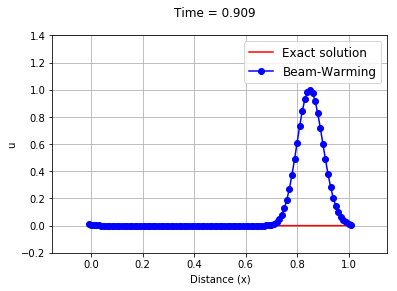

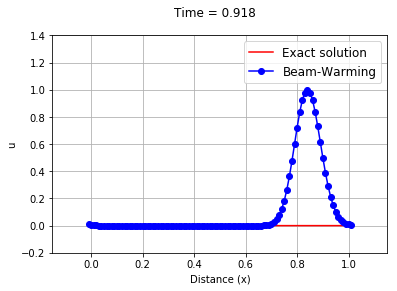

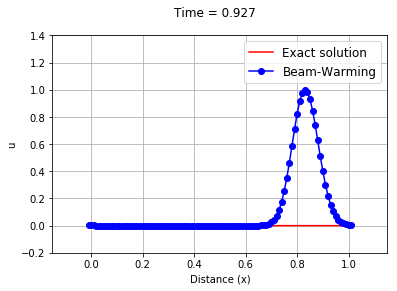

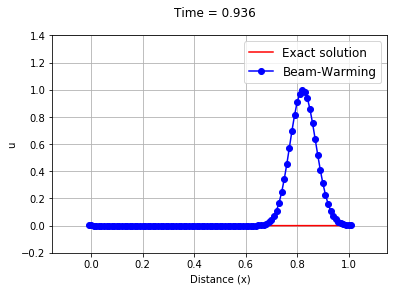

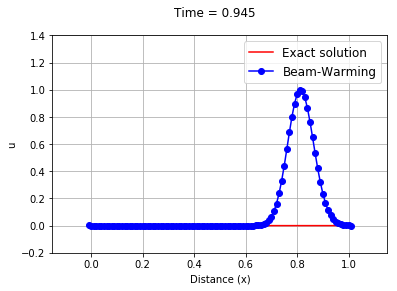

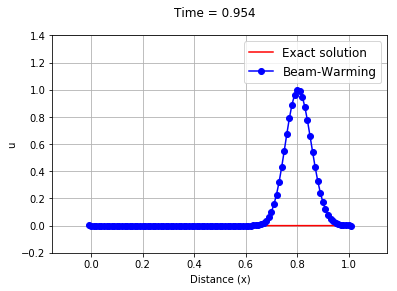

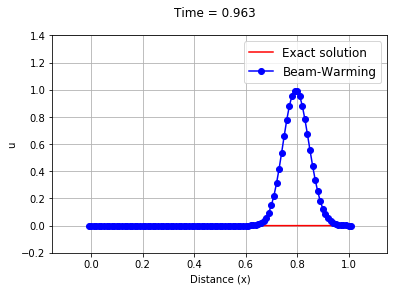

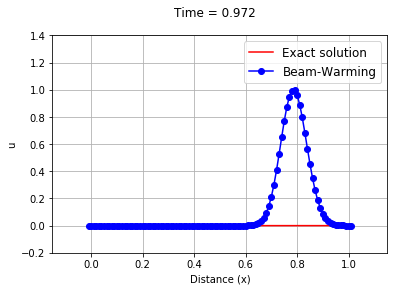

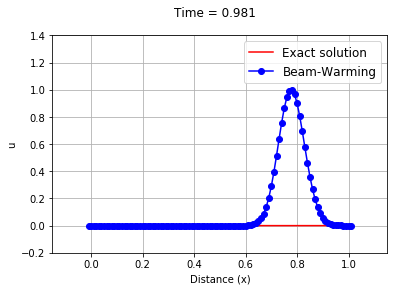

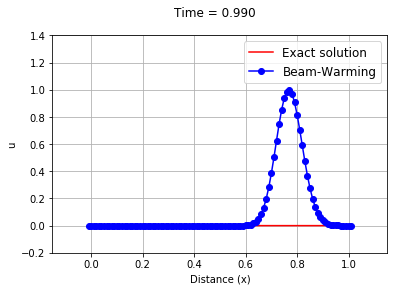

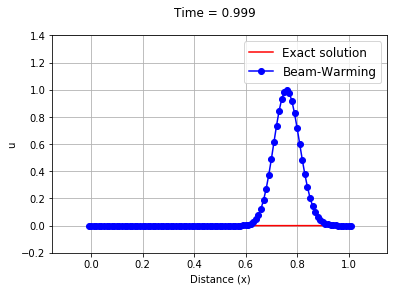

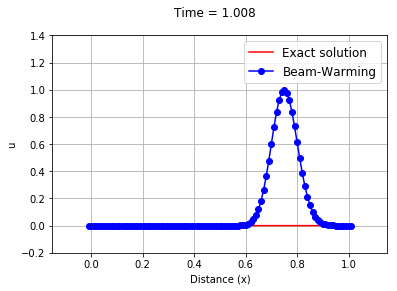

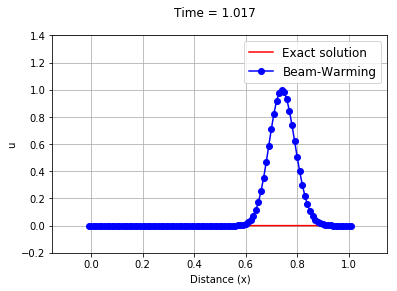

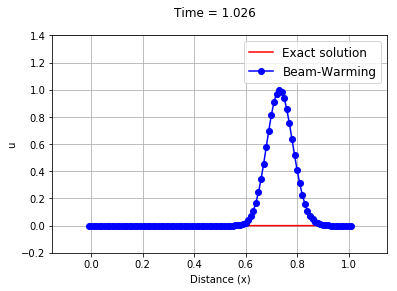

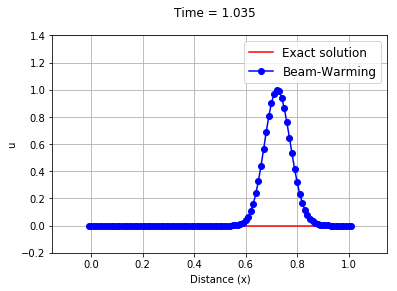

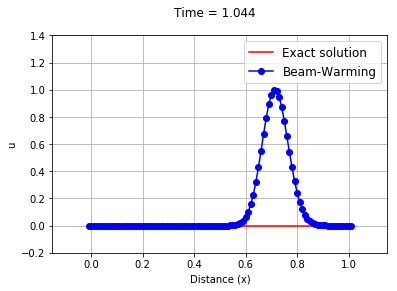

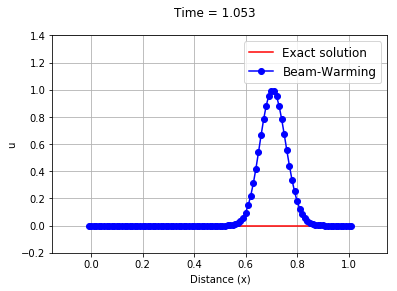

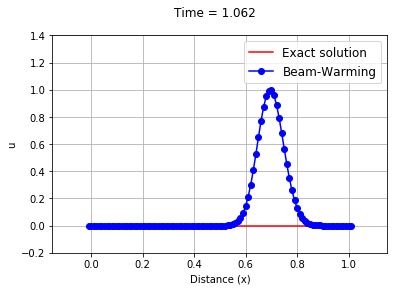

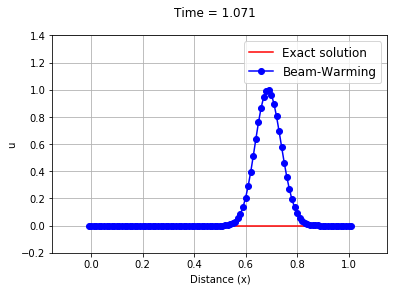

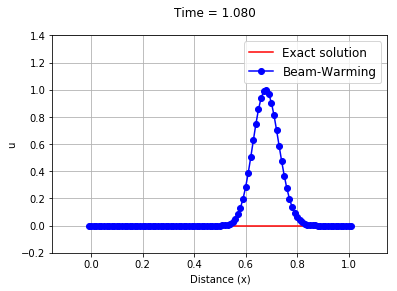

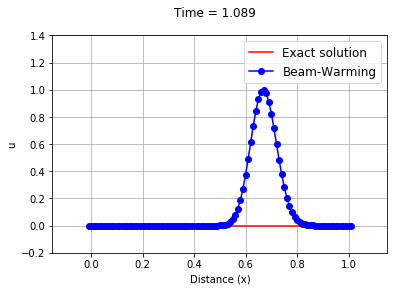

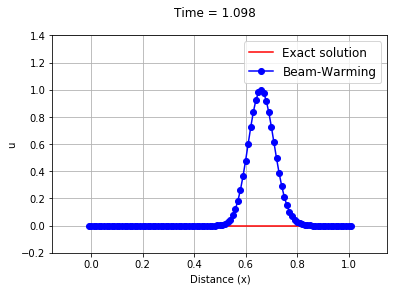

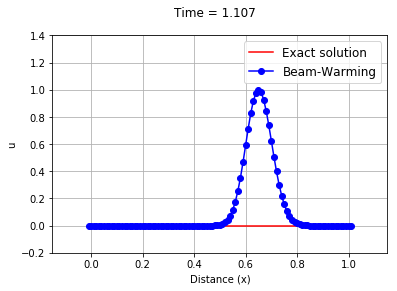

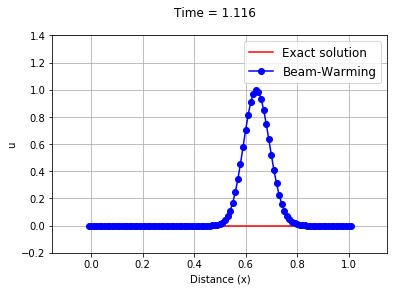

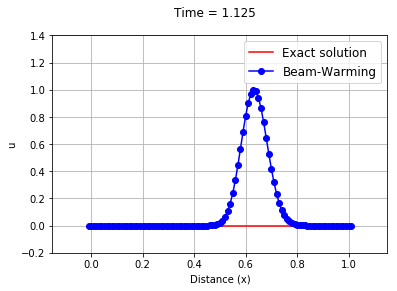

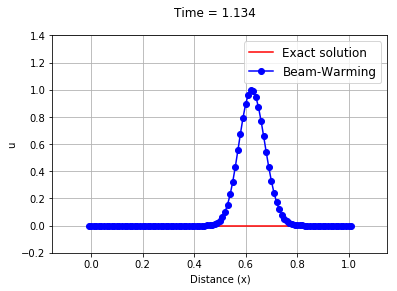

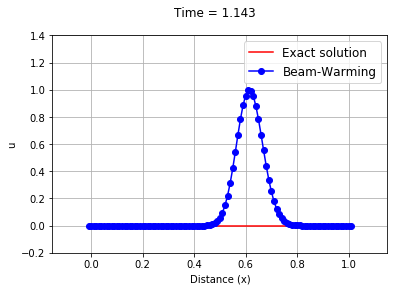

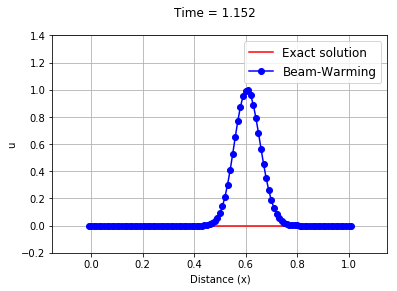

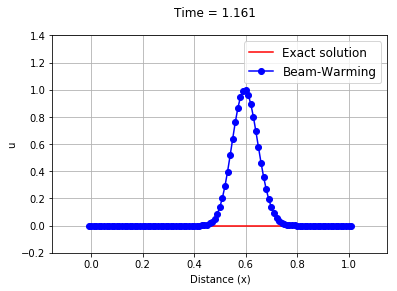

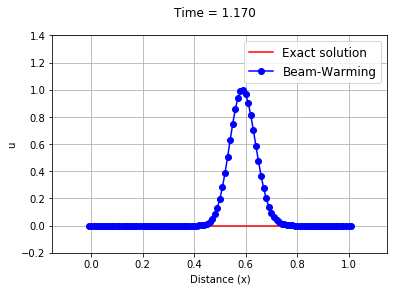

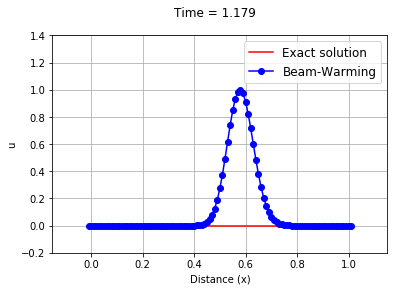

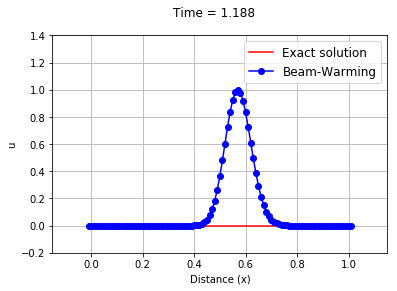

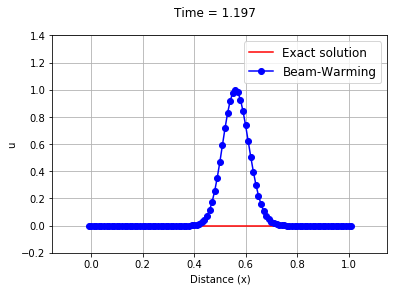

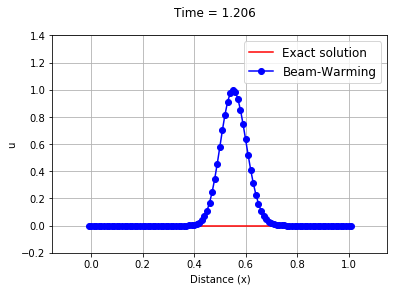

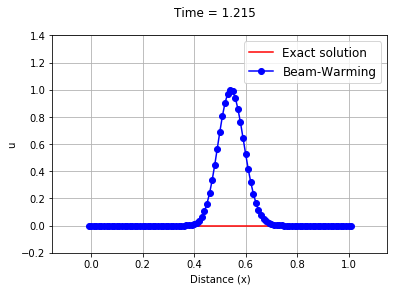

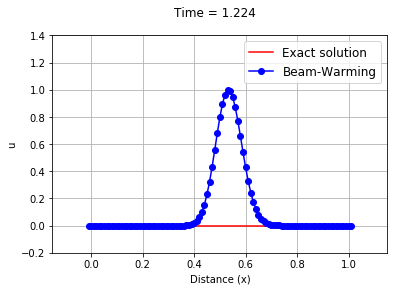

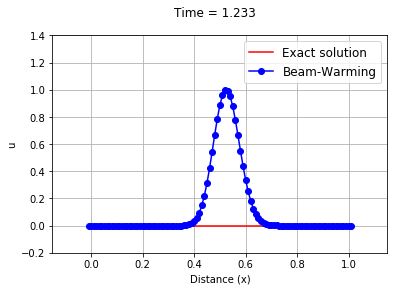

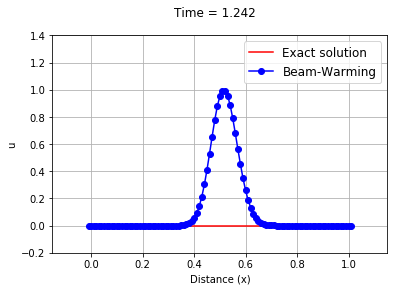

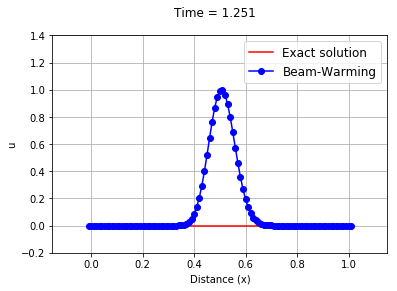

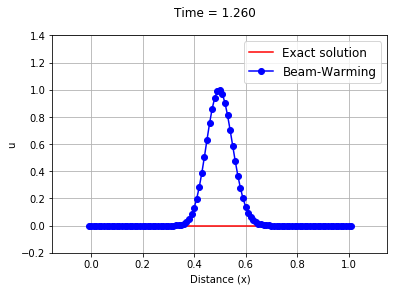

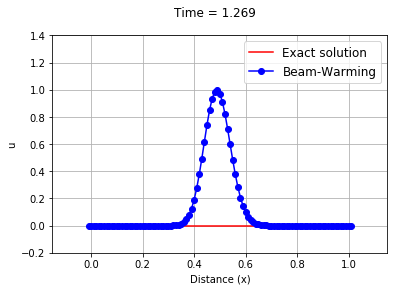

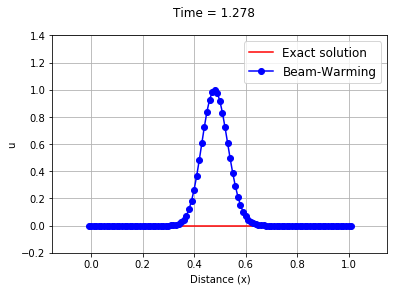

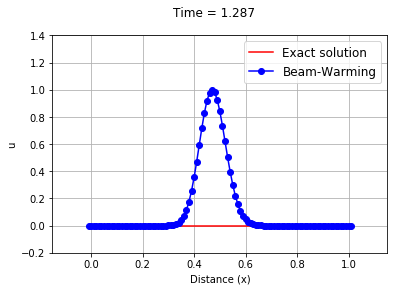

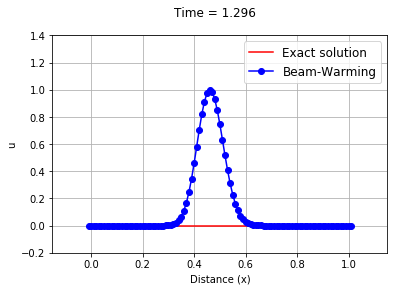

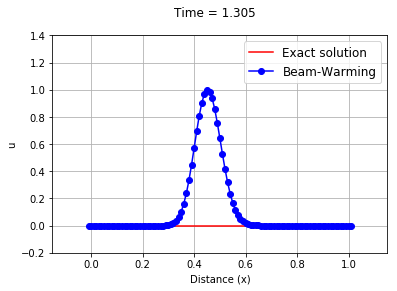

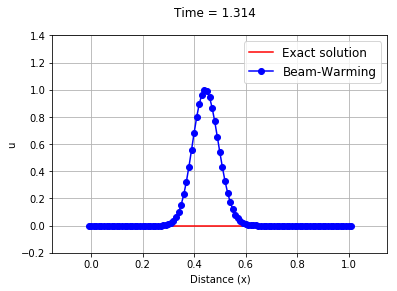

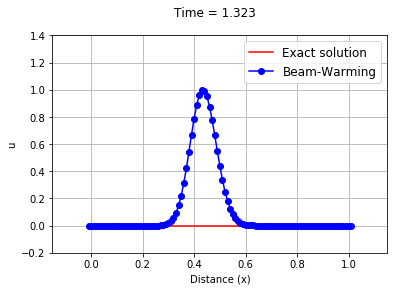

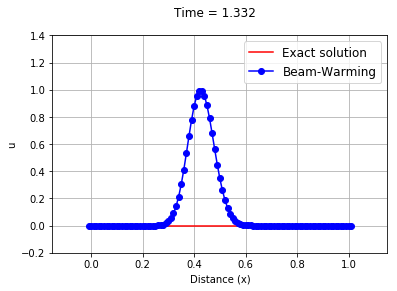

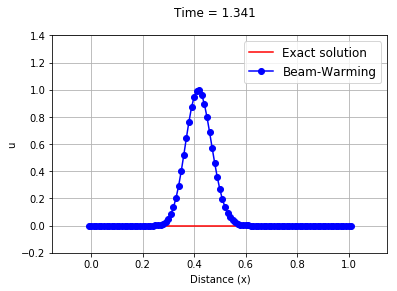

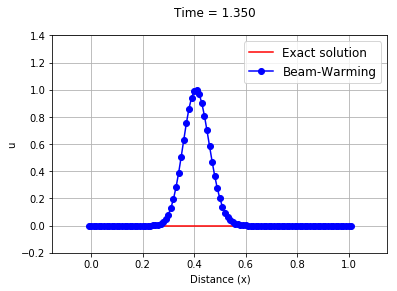

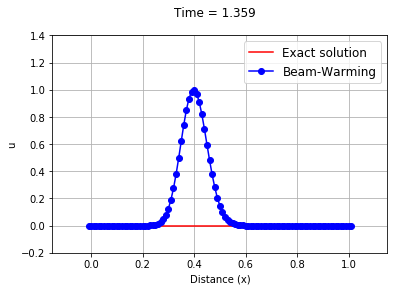

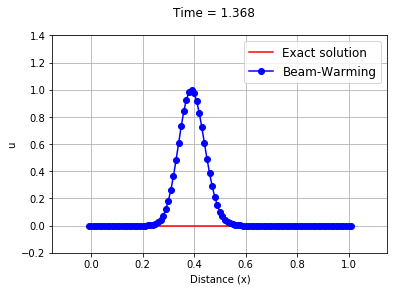

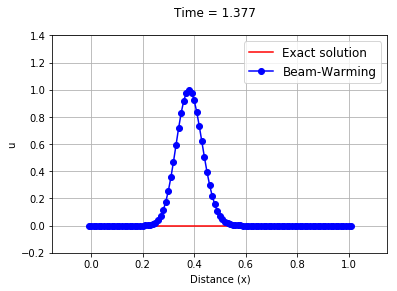

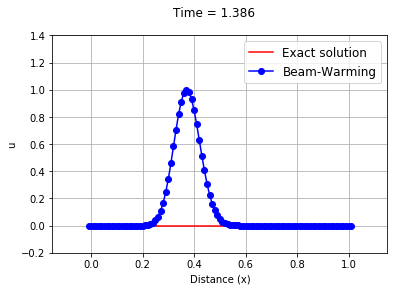

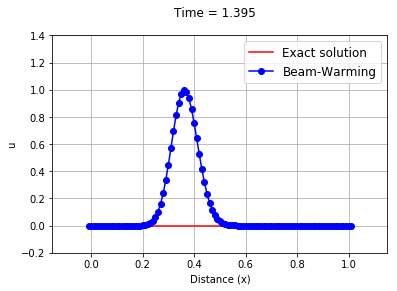

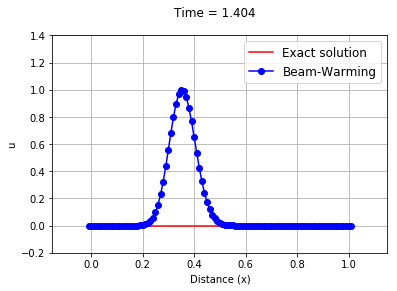

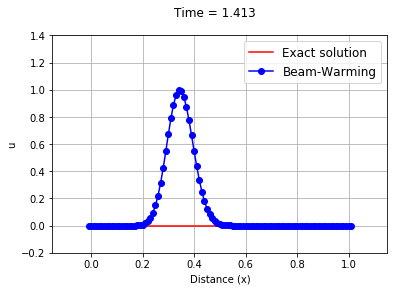

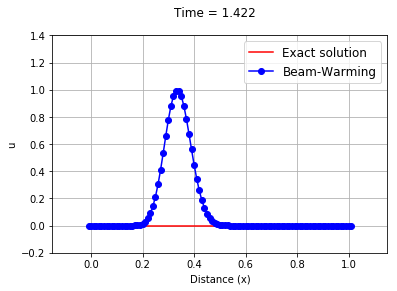

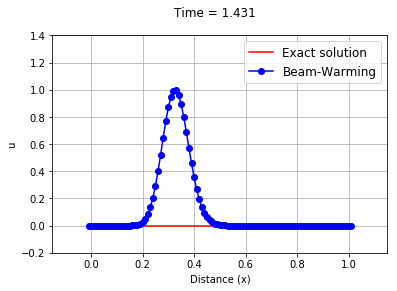

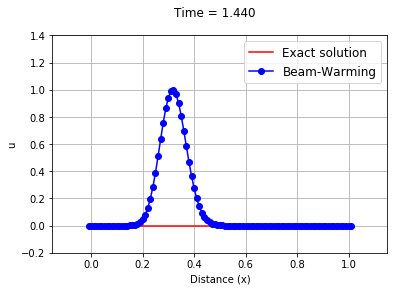

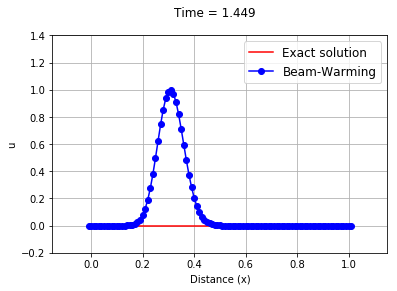

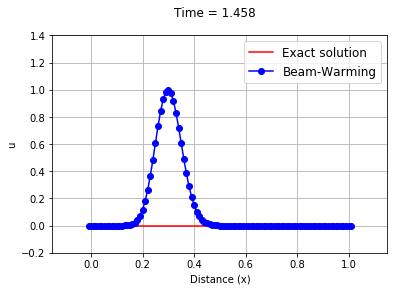

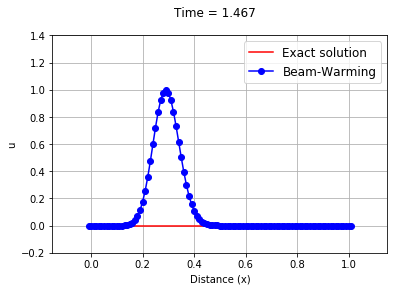

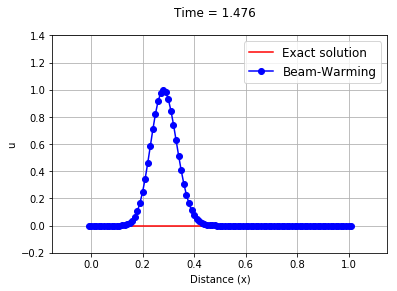

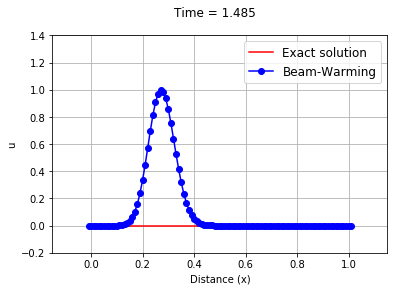

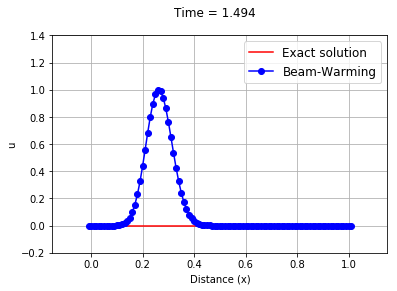

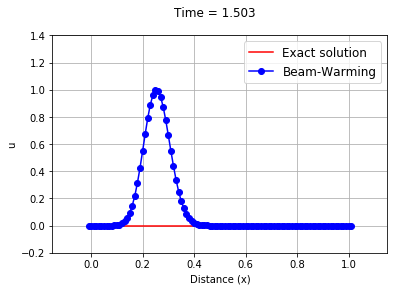

In [2]:
"""
This code solves the advection equation
    U_t + vU_x = 0

over the spatial domain of 0 <= x <= 1 that is discretized 
into 103 nodes, with dx=0.01, using the Beam-Warming scheme 
given by Eq. (18.26) with a<0, for an initial profile of a 
Gaussian curve, defined by 
    U(x,t) = exp(-200*(x-xc-v*t).^2)

where xc=0.75 is the center of the curve at t=0.

Periodic boundary conditions are applied at both ends of 
the domain.
    
The velocity is v=-1. The solution is iterated until t=1.5 seconds.
"""

import numpy as np
import matplotlib.pyplot as plt


class beamWarming2:
    
    def __init__(self, N, tmax):
        self.N = N # number of nodes
        self.tmax = tmax
        self.xmin = 0
        self.xmax = 1
        self.dt = 0.009 # timestep
        self.v = -1 # velocity
        self.xc = 0.75
        self.initializeDomain()
        self.initializeU()
        self.initializeParams()
        
        
    def initializeDomain(self):
        self.dx = (self.xmax - self.xmin)/self.N
        self.x = np.arange(self.xmin-self.dx, self.xmax+(2*self.dx), self.dx)
        
        
    def initializeU(self):
        u0 = np.exp(-200*(self.x-self.xc)**2)
        self.u = u0.copy()
        self.unp1 = u0.copy()
        
        
    def initializeParams(self):
        self.nsteps = round(self.tmax/self.dt)
        self.alpha1 = self.v*self.dt/(2*self.dx)
        self.alpha2 = self.v**2*self.dt**2/(2*self.dx**2)
        
        
    def solve_and_plot(self):
        tc = 0
        
        for i in range(self.nsteps):
            plt.clf()
            
            # The Beam-Warming scheme, Eq. (18.26)
            for j in range(self.N+1):
                self.unp1[j] = self.u[j] - self.alpha1*(-3*self.u[j] + 4*self.u[j+1] - self.u[j+2]) + \
                self.alpha2*(self.u[j] - 2*self.u[j+1] + self.u[j+2])        
                
            self.u = self.unp1.copy()
            
            # Periodic BCs
            self.u[self.N+1] = self.u[0]
            self.u[self.N+2] = self.u[1]
            
            uexact = np.exp(-200*(self.x-self.xc-self.v*tc)**2)
            
            plt.plot(self.x, uexact, 'r', label="Exact solution")
            plt.plot(self.x, self.u, 'bo-', label="Beam-Warming")
            plt.axis((self.xmin-0.15, self.xmax+0.15, -0.2, 1.4))
            plt.grid(True)
            plt.xlabel("Distance (x)")
            plt.ylabel("u")
            plt.legend(loc=1, fontsize=12)
            plt.suptitle("Time = %1.3f" % (tc+self.dt))
            plt.pause(0.01)
            tc += self.dt


def main():
    sim = beamWarming2(100, 1.5)
    sim.solve_and_plot()
    plt.show()
    
if __name__ == "__main__":
    main()

#N = 100  
#tmax = 2.5 # maximum value of t